# Table of contents

* [Stock as time series](#stock_as_TS)
* [Aside: Random walk](#random_walk)
* [Aside: White noise](#white_noise)
* [Aside: Simulating ARMA](#ARMA)
    * [ARMA model](#arma)
    * [AR model](#ar)
    * [MA model](#ma)
* [Back to stock](#back_to_stock)

# Stock as time series <a class="anchor" id="stock_as_TS"></a>

In [84]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

%matplotlib inline
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [85]:
google = pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])
apple = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])

groups = {'GOOG':google,'MSFT':microsoft,'AAPL':apple}

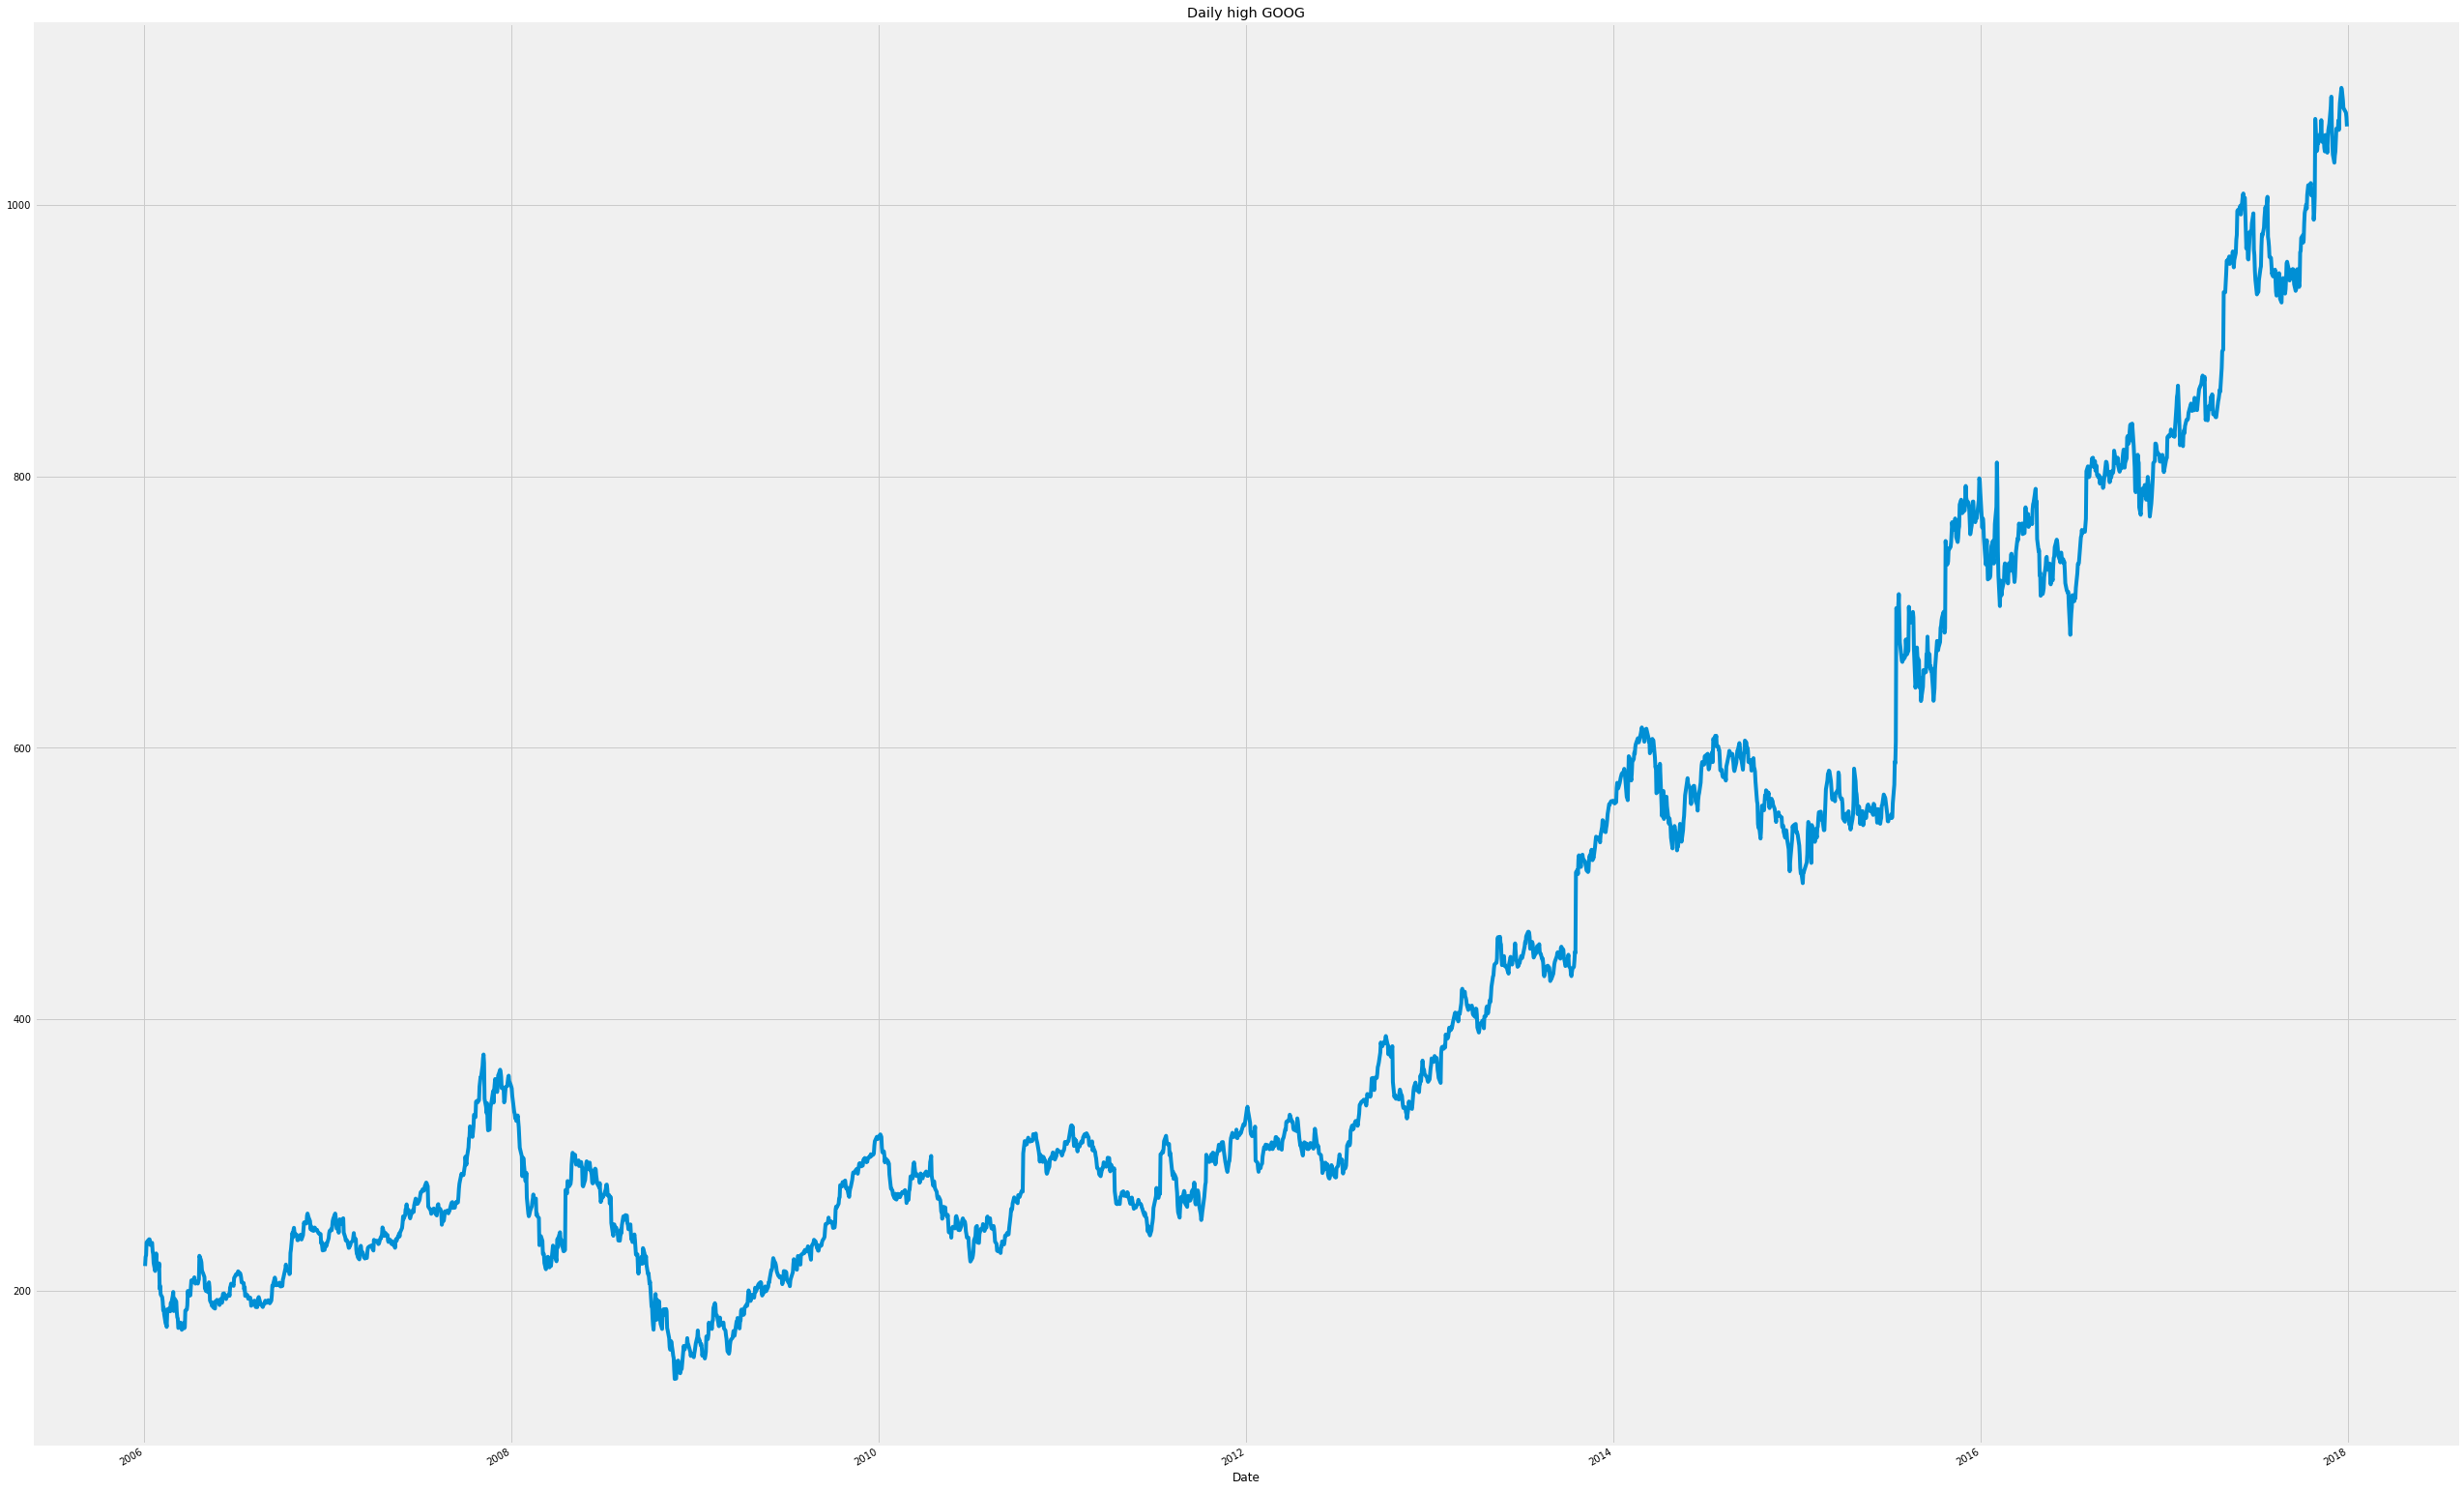

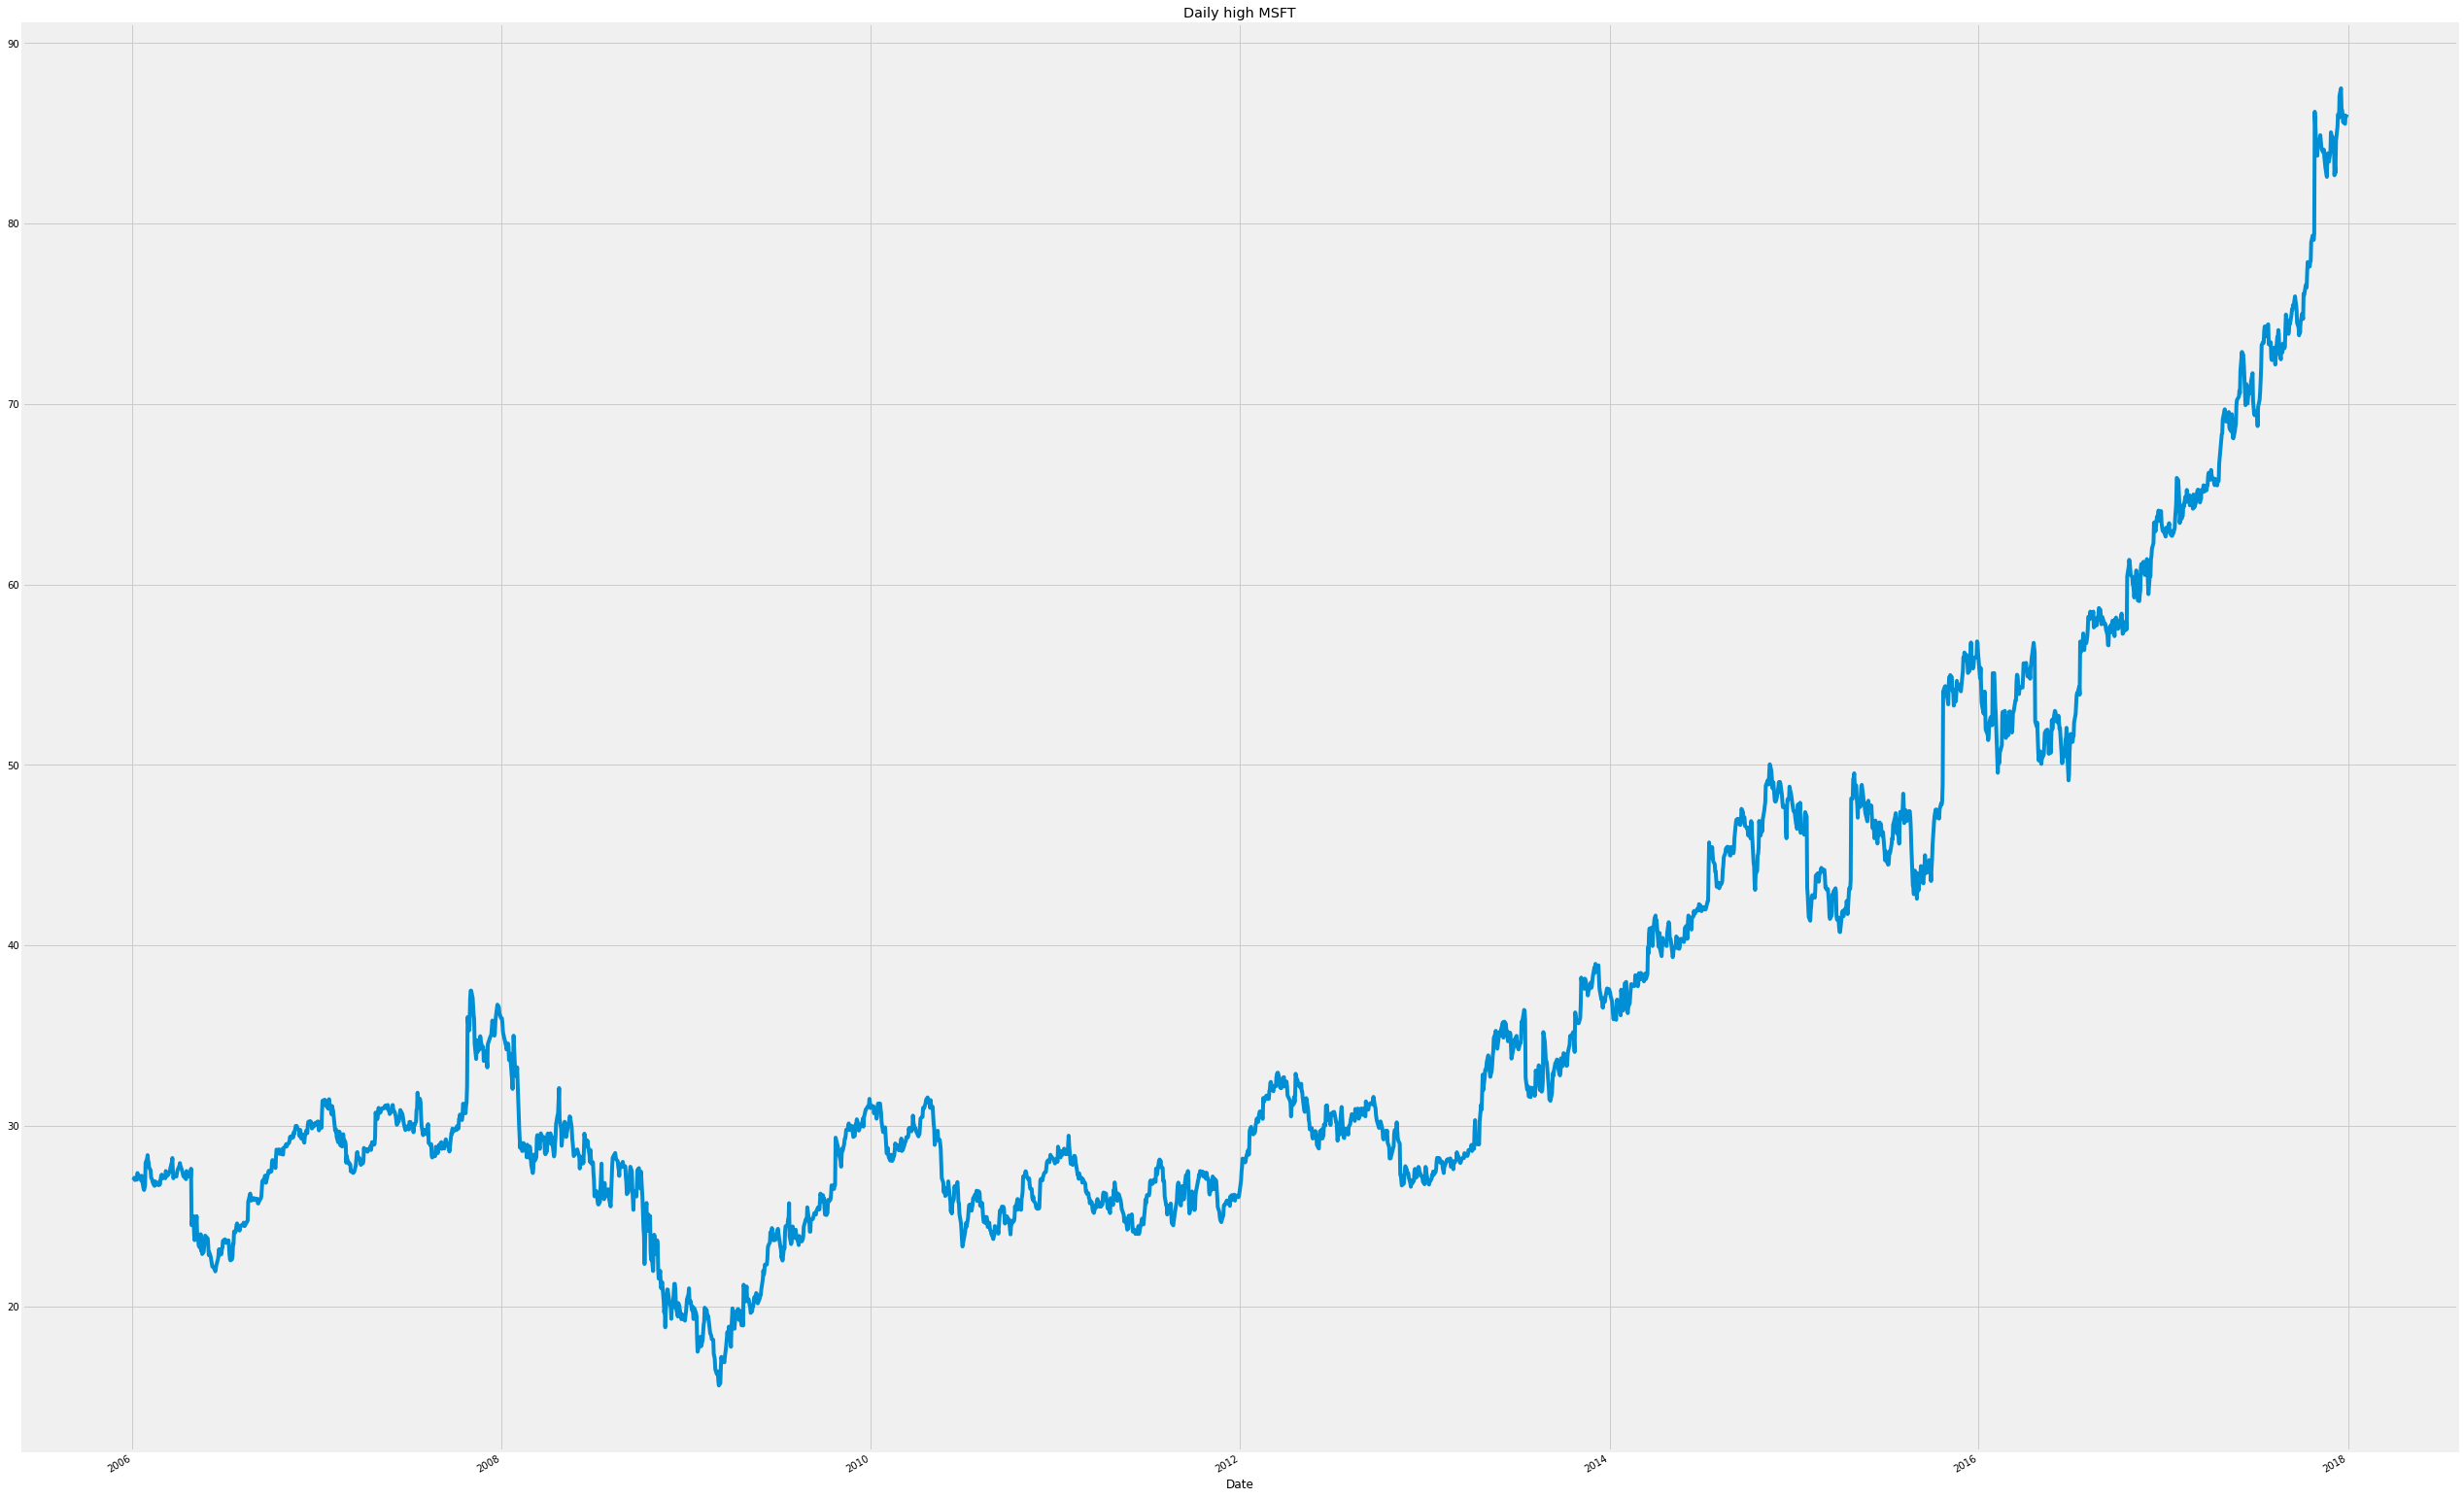

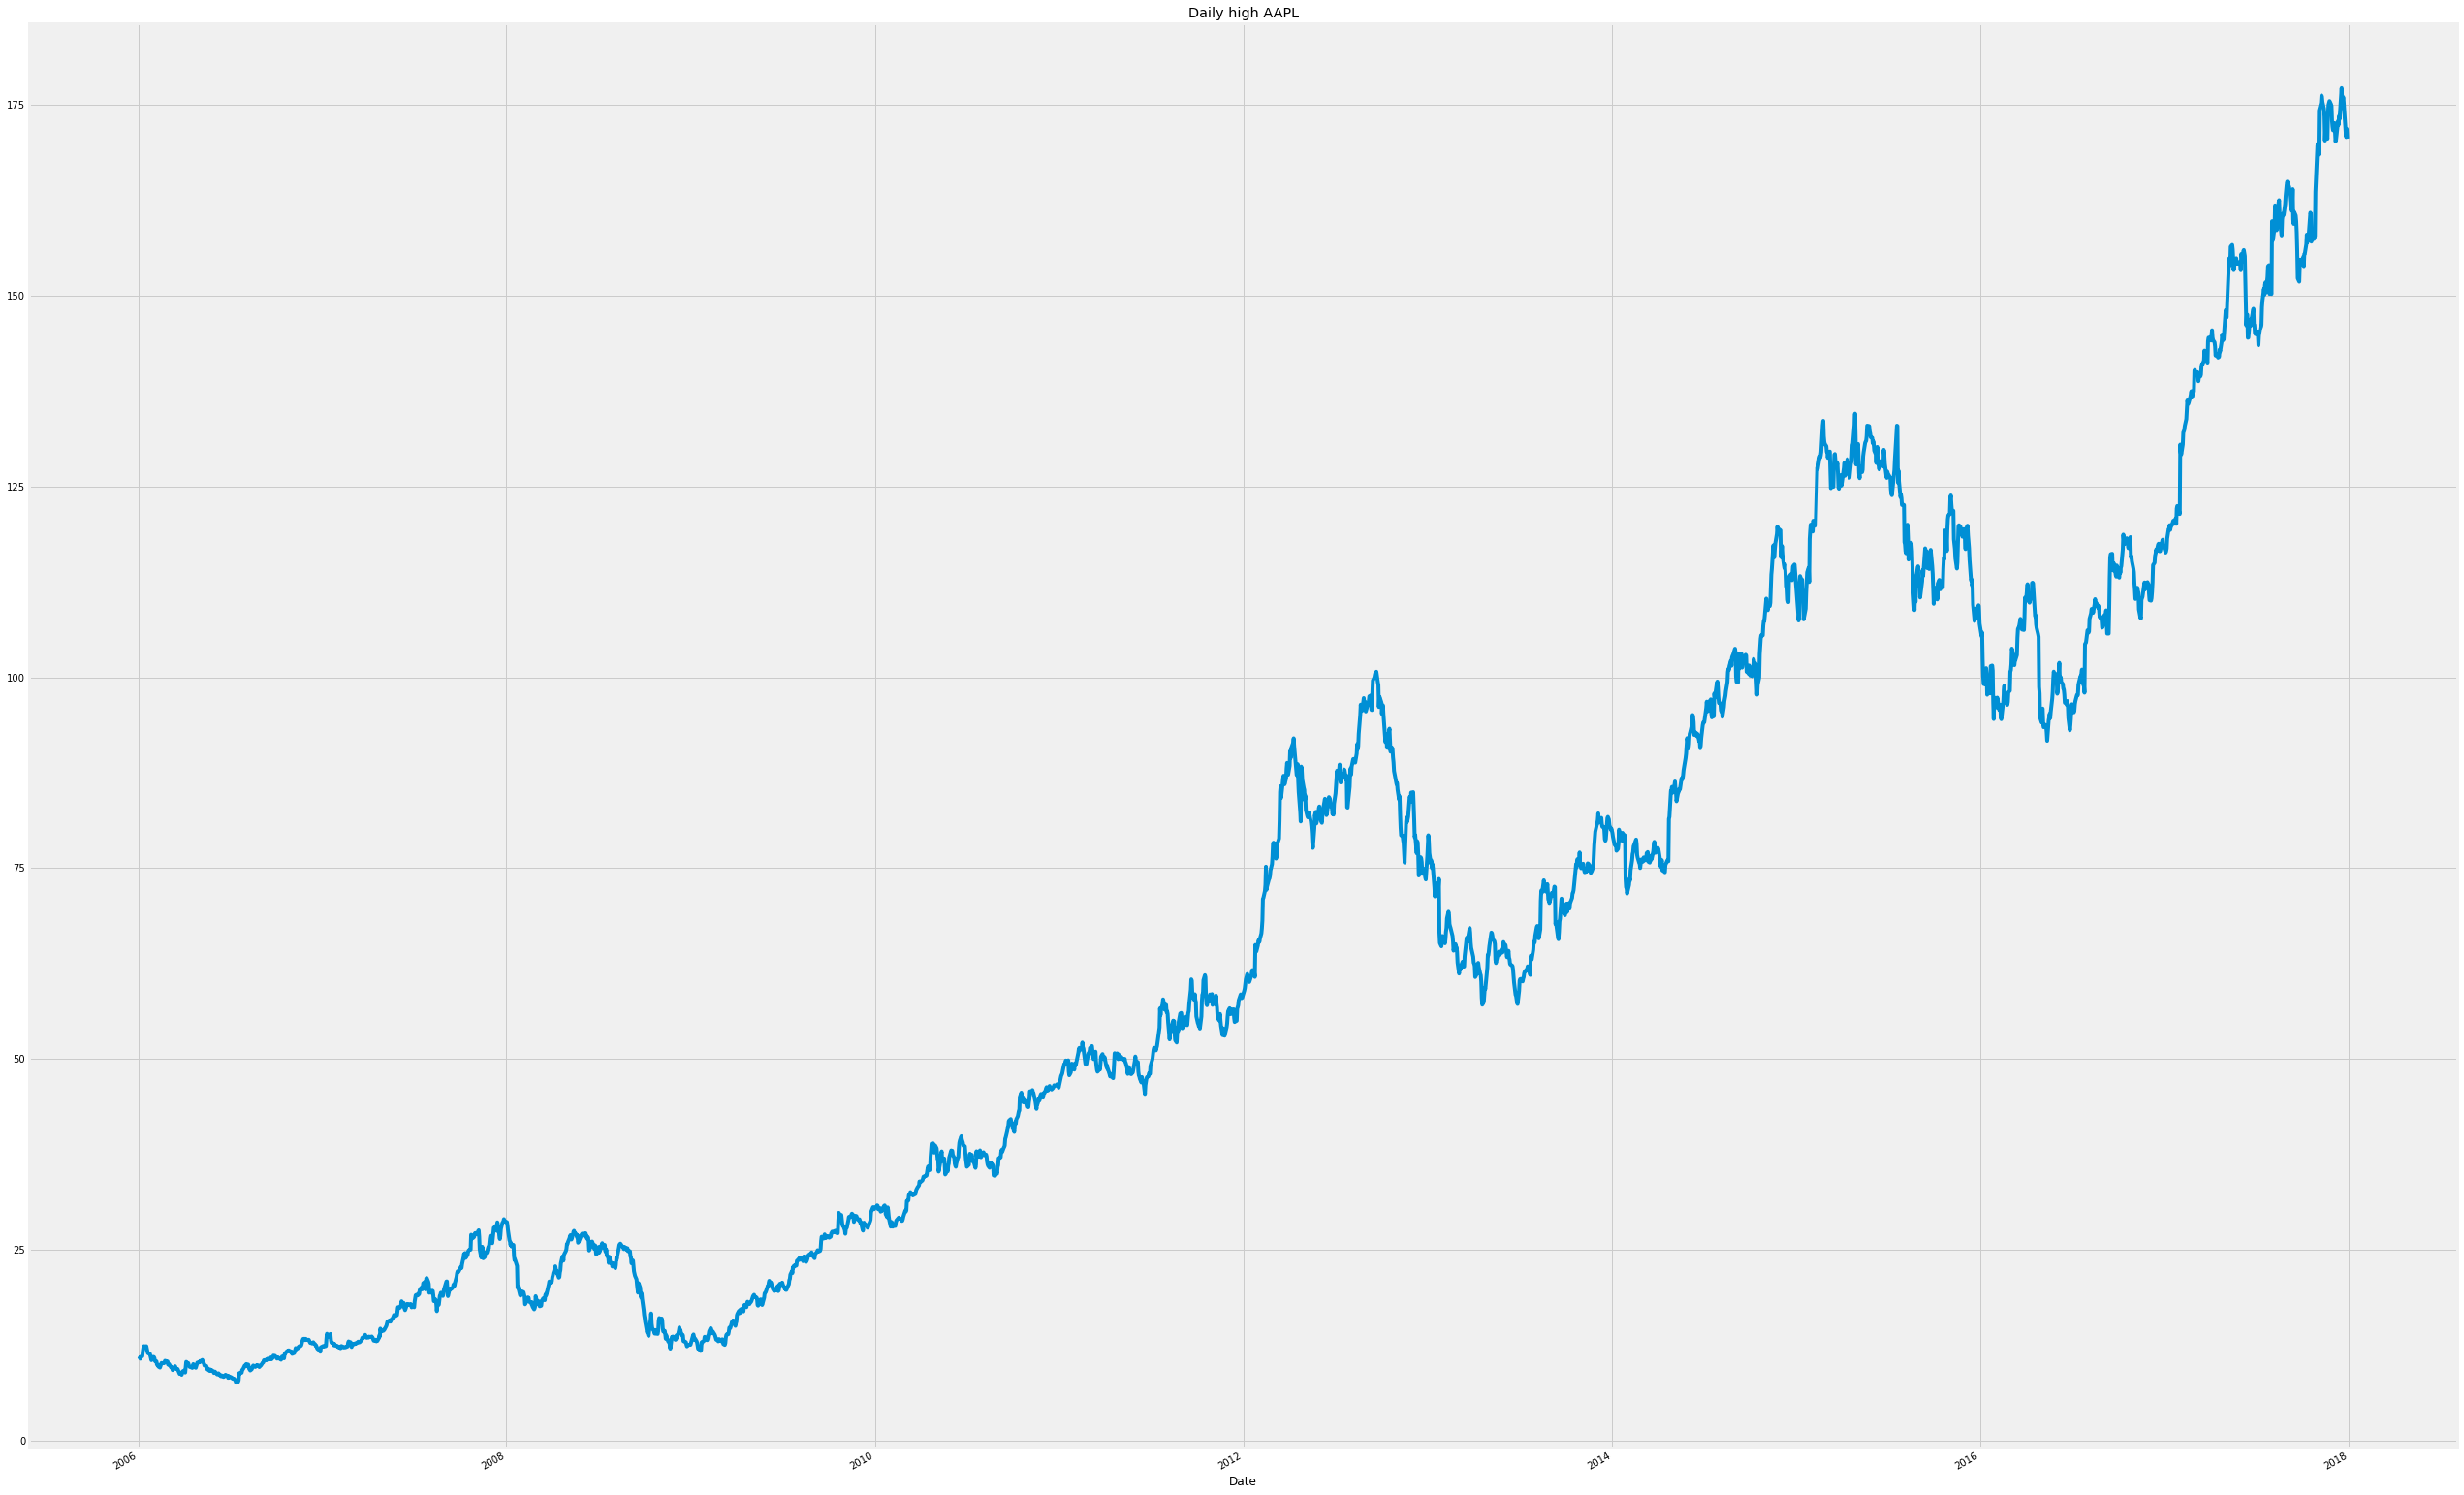

In [87]:
for stock in groups:
    plt.rcParams["figure.figsize"] = (40,30)
    groups[stock].High.plot()
    plt.title('Daily high {}'.format(stock))
    plt.show()

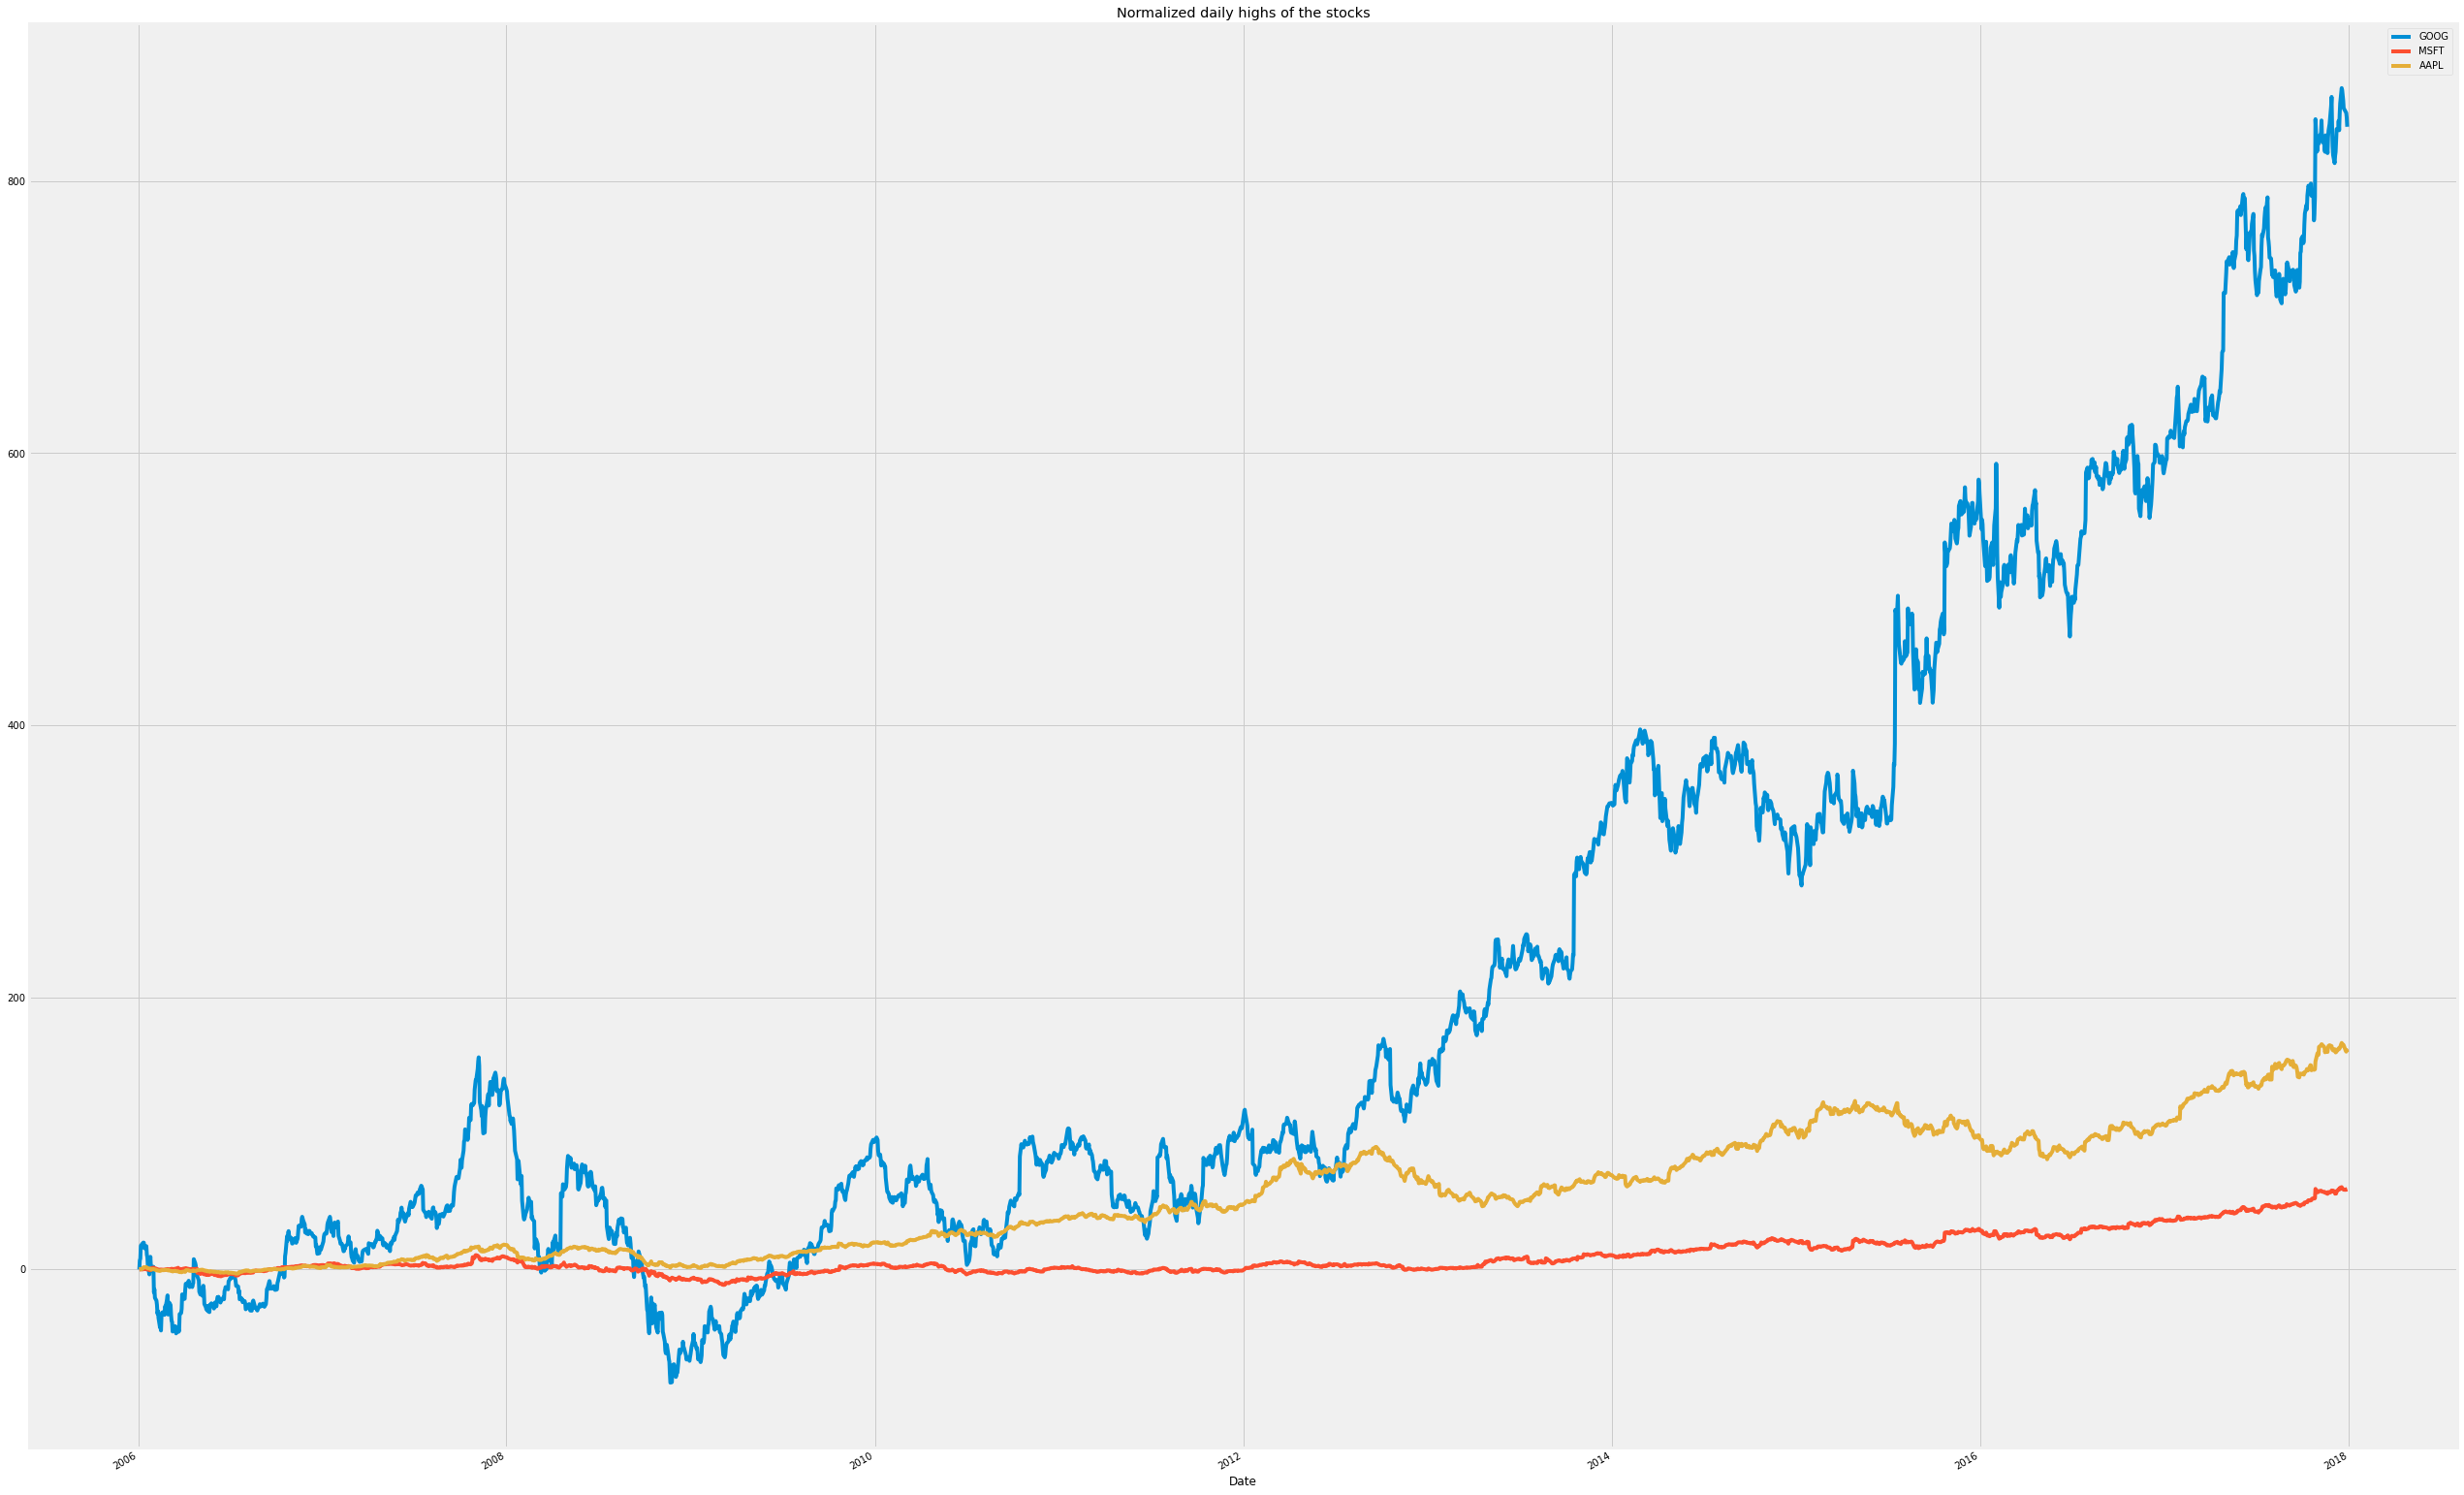

In [91]:
def normalize(arr):
    temp = arr-arr.iloc[0]
    return temp

for stock in groups:
    normalize(groups[stock].High).plot()

plt.rcParams["figure.figsize"] = (40,30)
plt.legend(groups.keys())
plt.title('Normalized daily highs of the stocks')
plt.show()

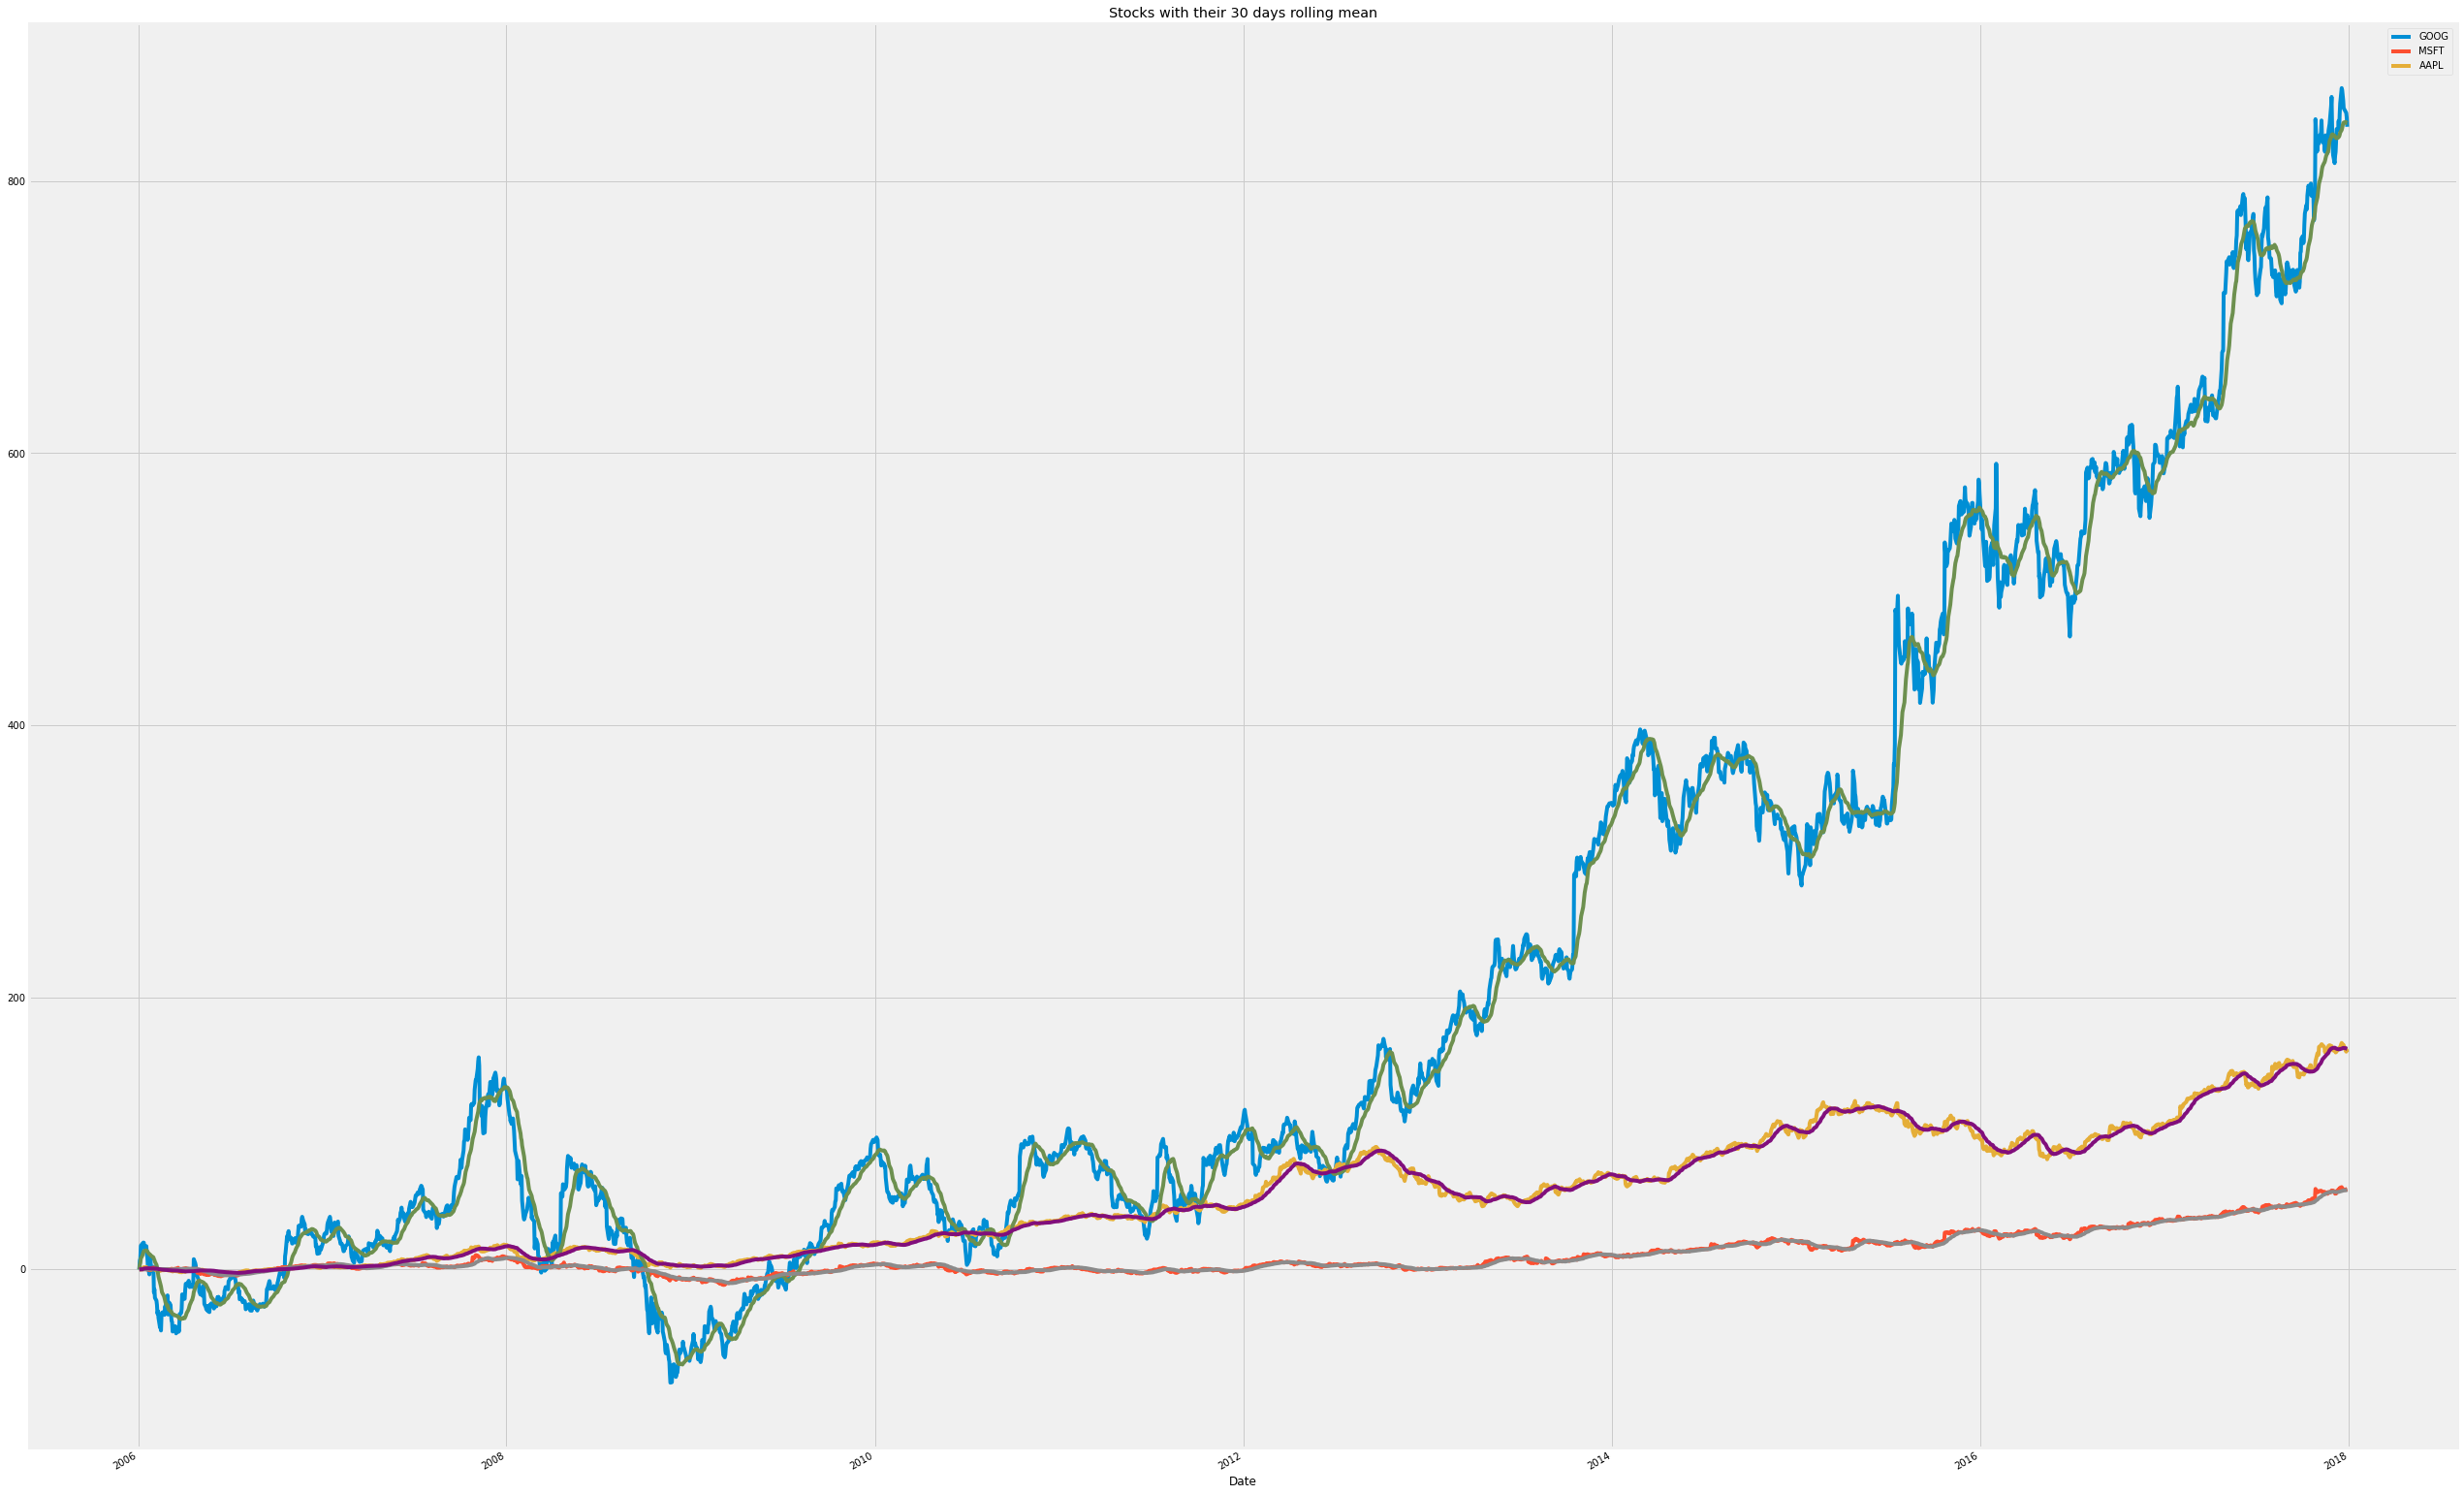

In [89]:
def rolling_mean(arr,days):
    return arr.rolling(str(days)+'D').mean()

rolling_const = 30

for stock in groups:
    normed_arr = normalize(groups[stock].High)
    normed_arr.plot()
    
for stock in groups:
    normed_arr = normalize(groups[stock].High)
    rolling_mean(normed_arr,rolling_const).plot()
    
plt.legend(groups.keys())
plt.title('Stocks with their {} days rolling mean'.format(rolling_const))
plt.show()

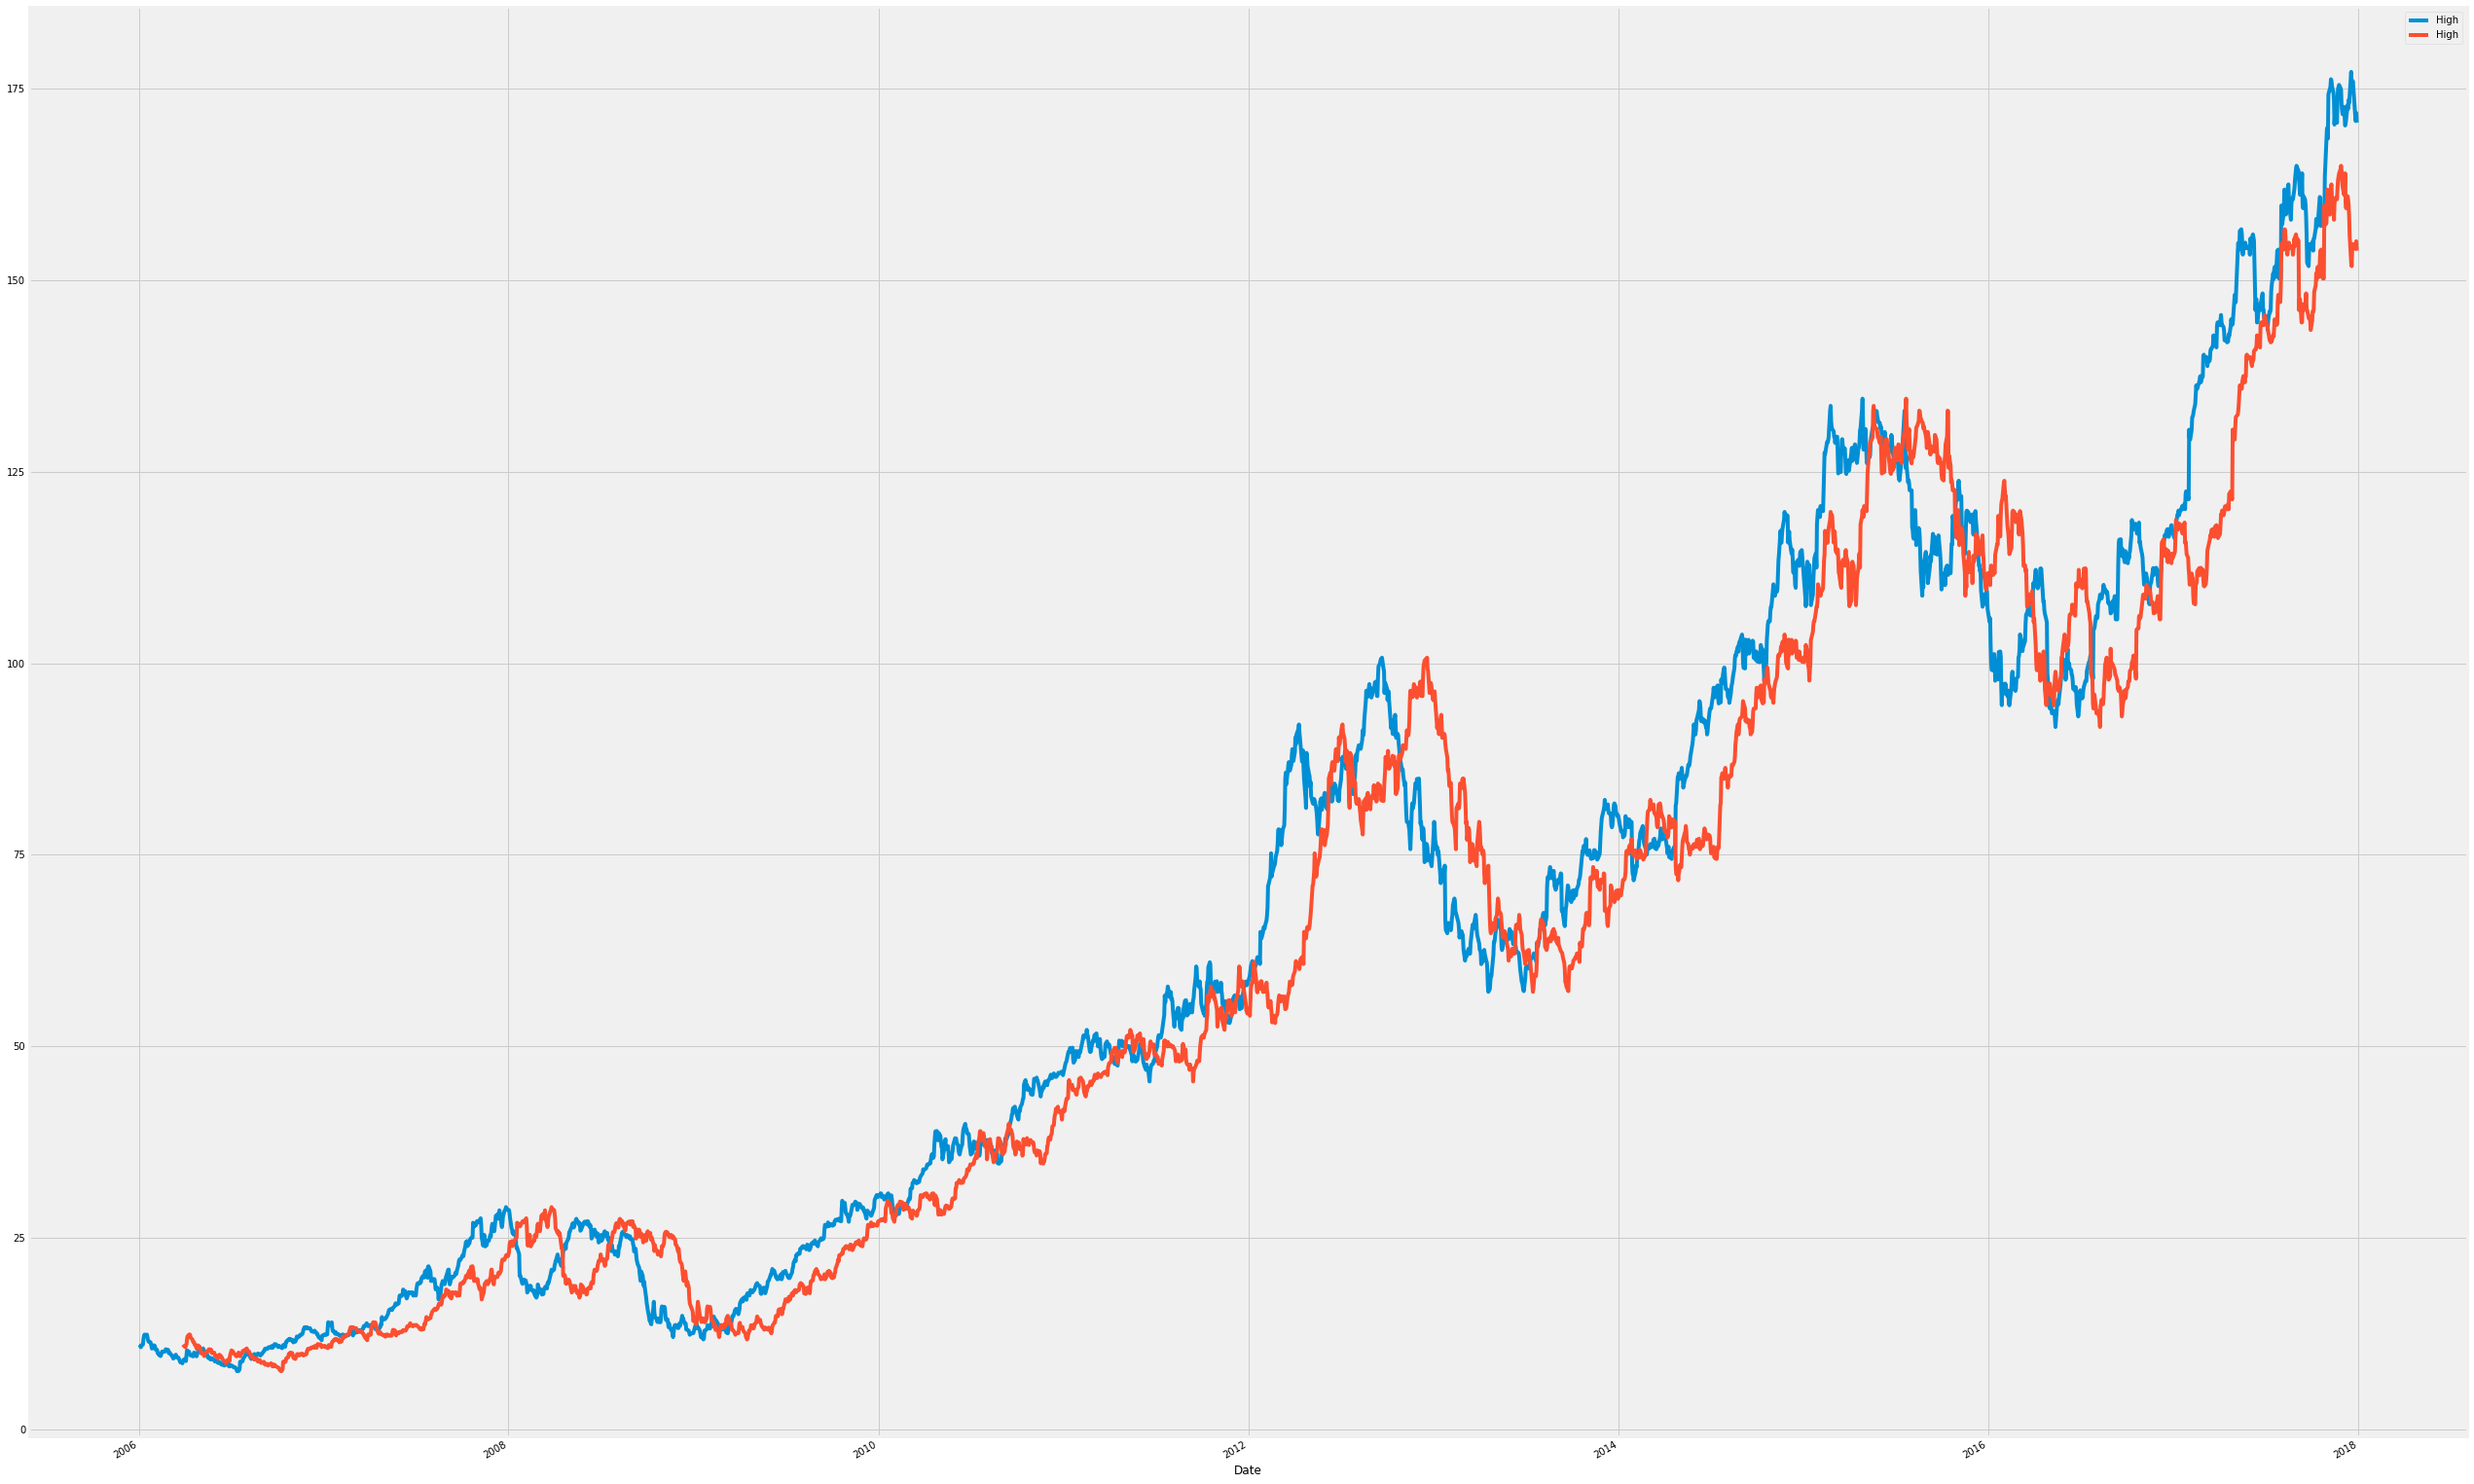

In [90]:
# Aside: lagged time series

apple.High.plot(legend=True)
apple.High.shift(60).plot(legend=True)
plt.rcParams["figure.figsize"] = (40,30)
plt.show()

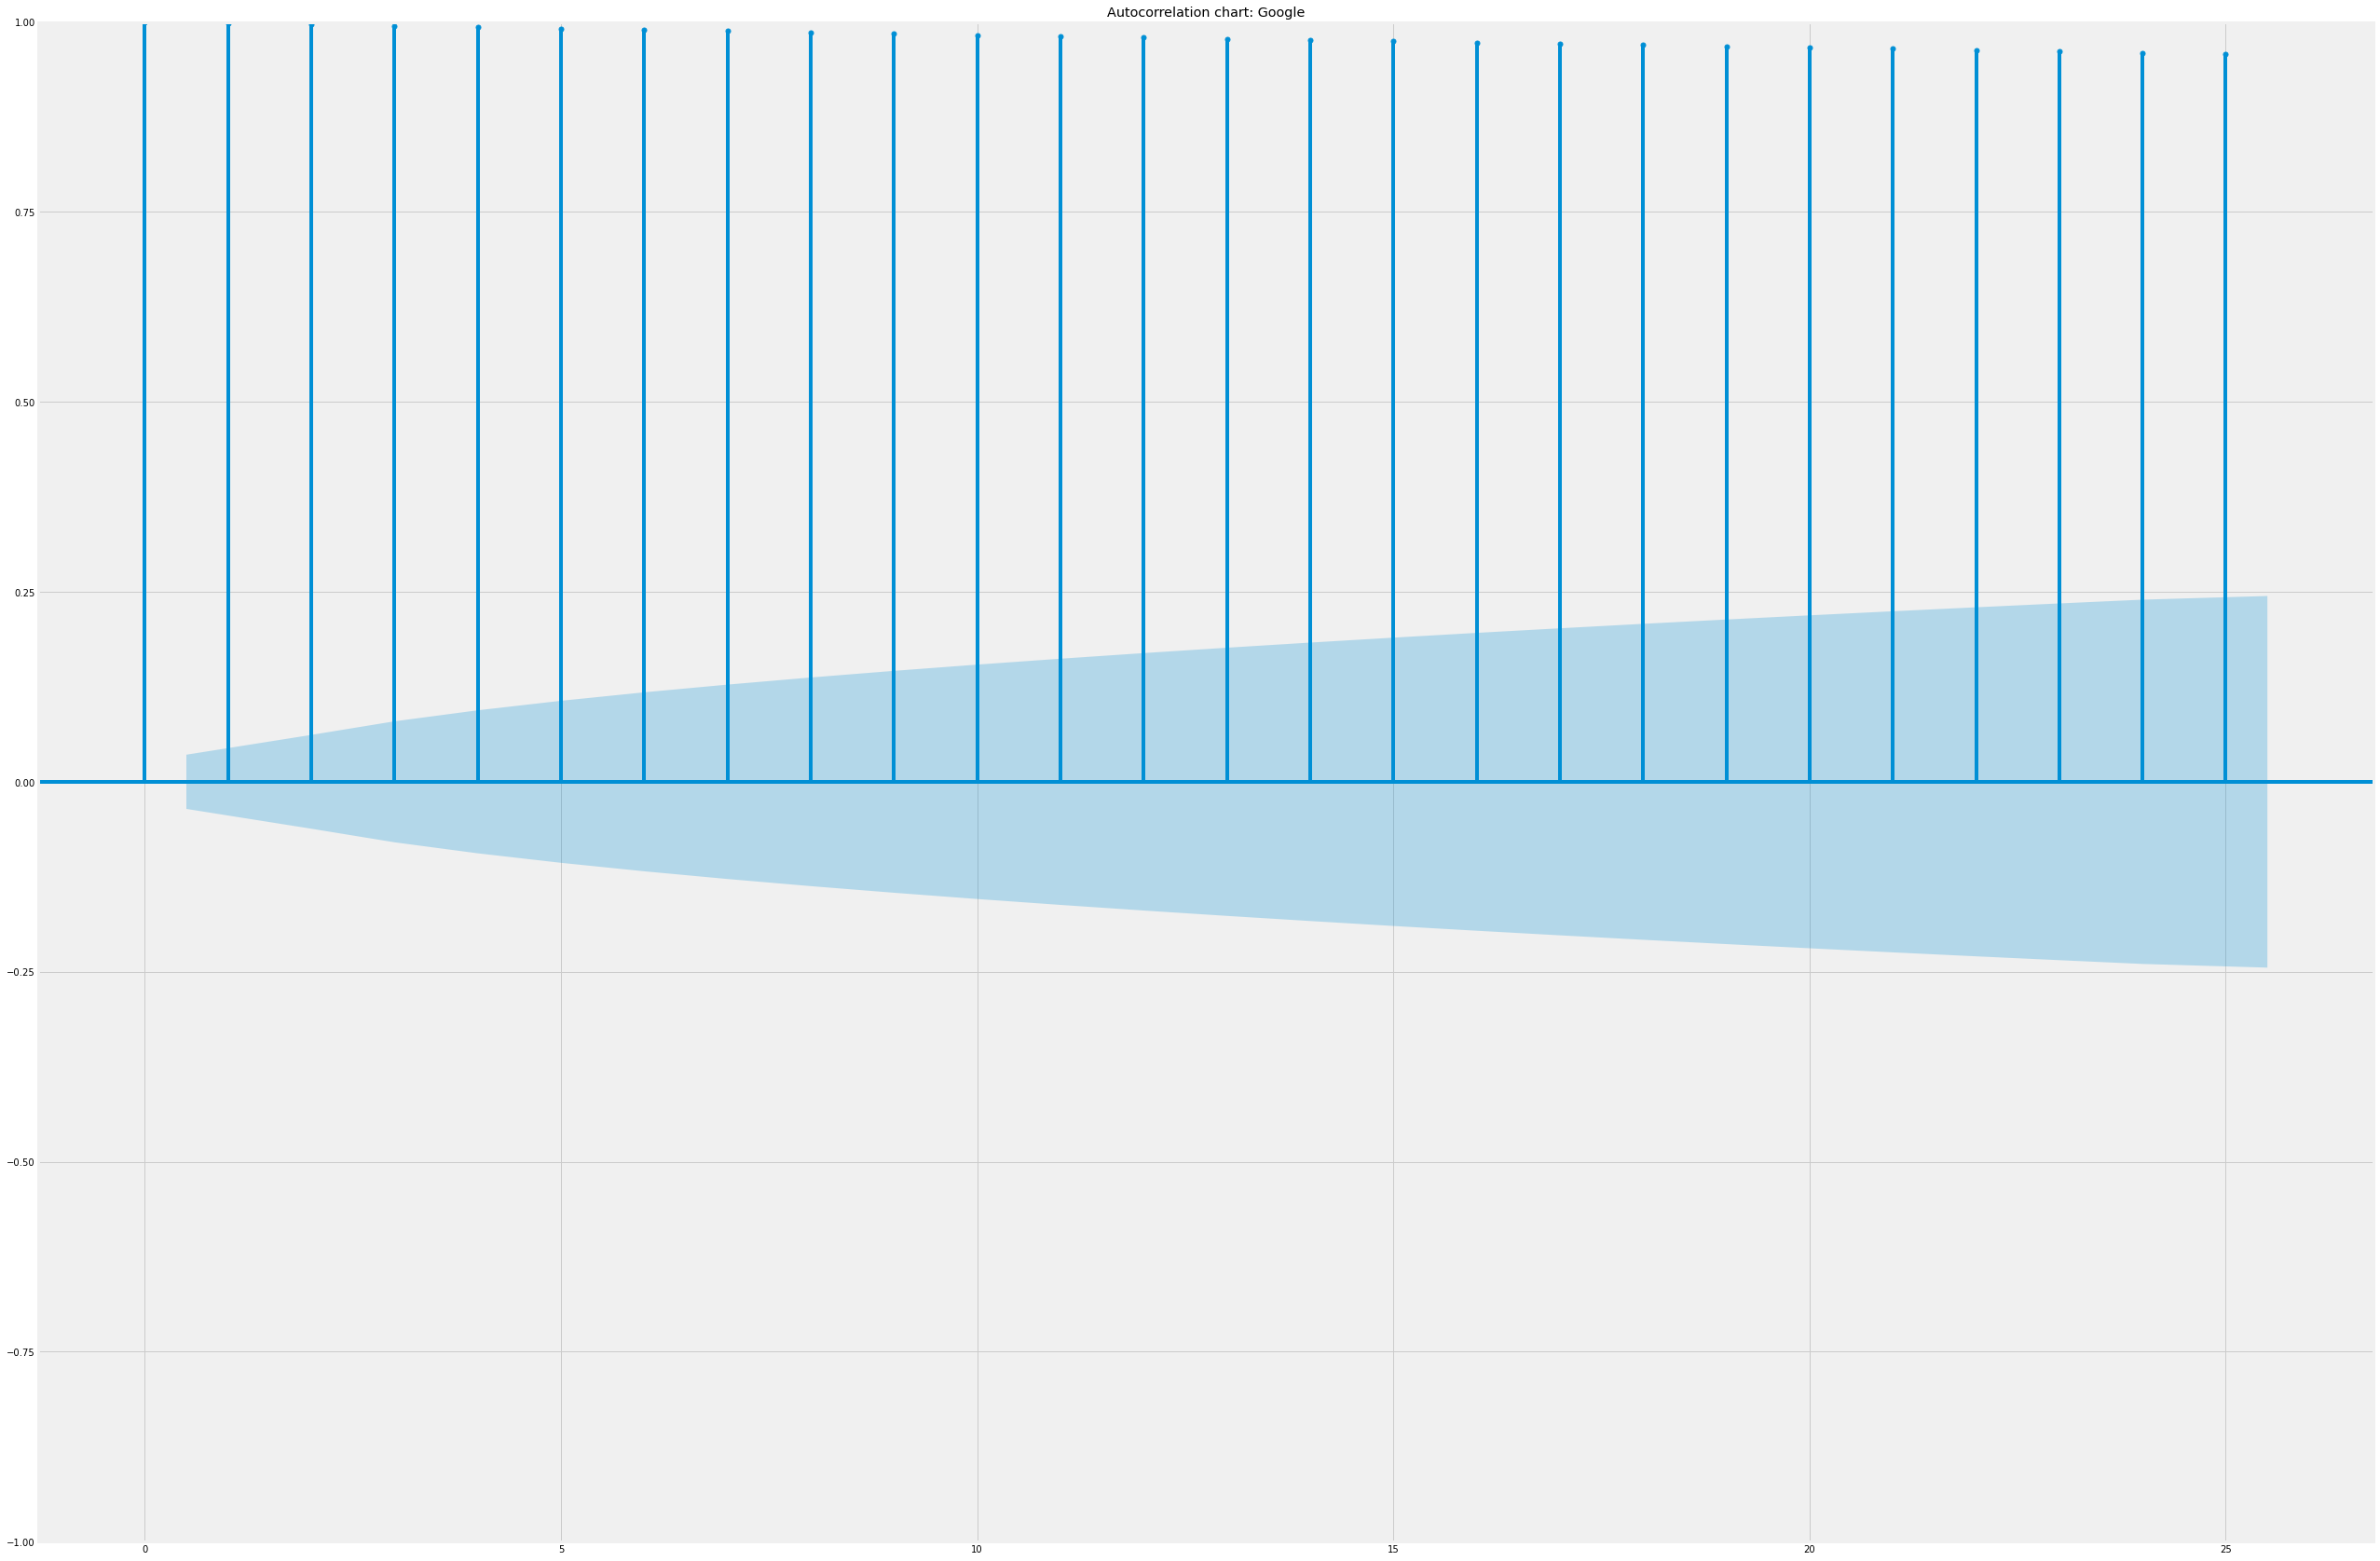

In [92]:
plot_acf(google.High,lags=25,title="Autocorrelation chart: Google")
plt.show()

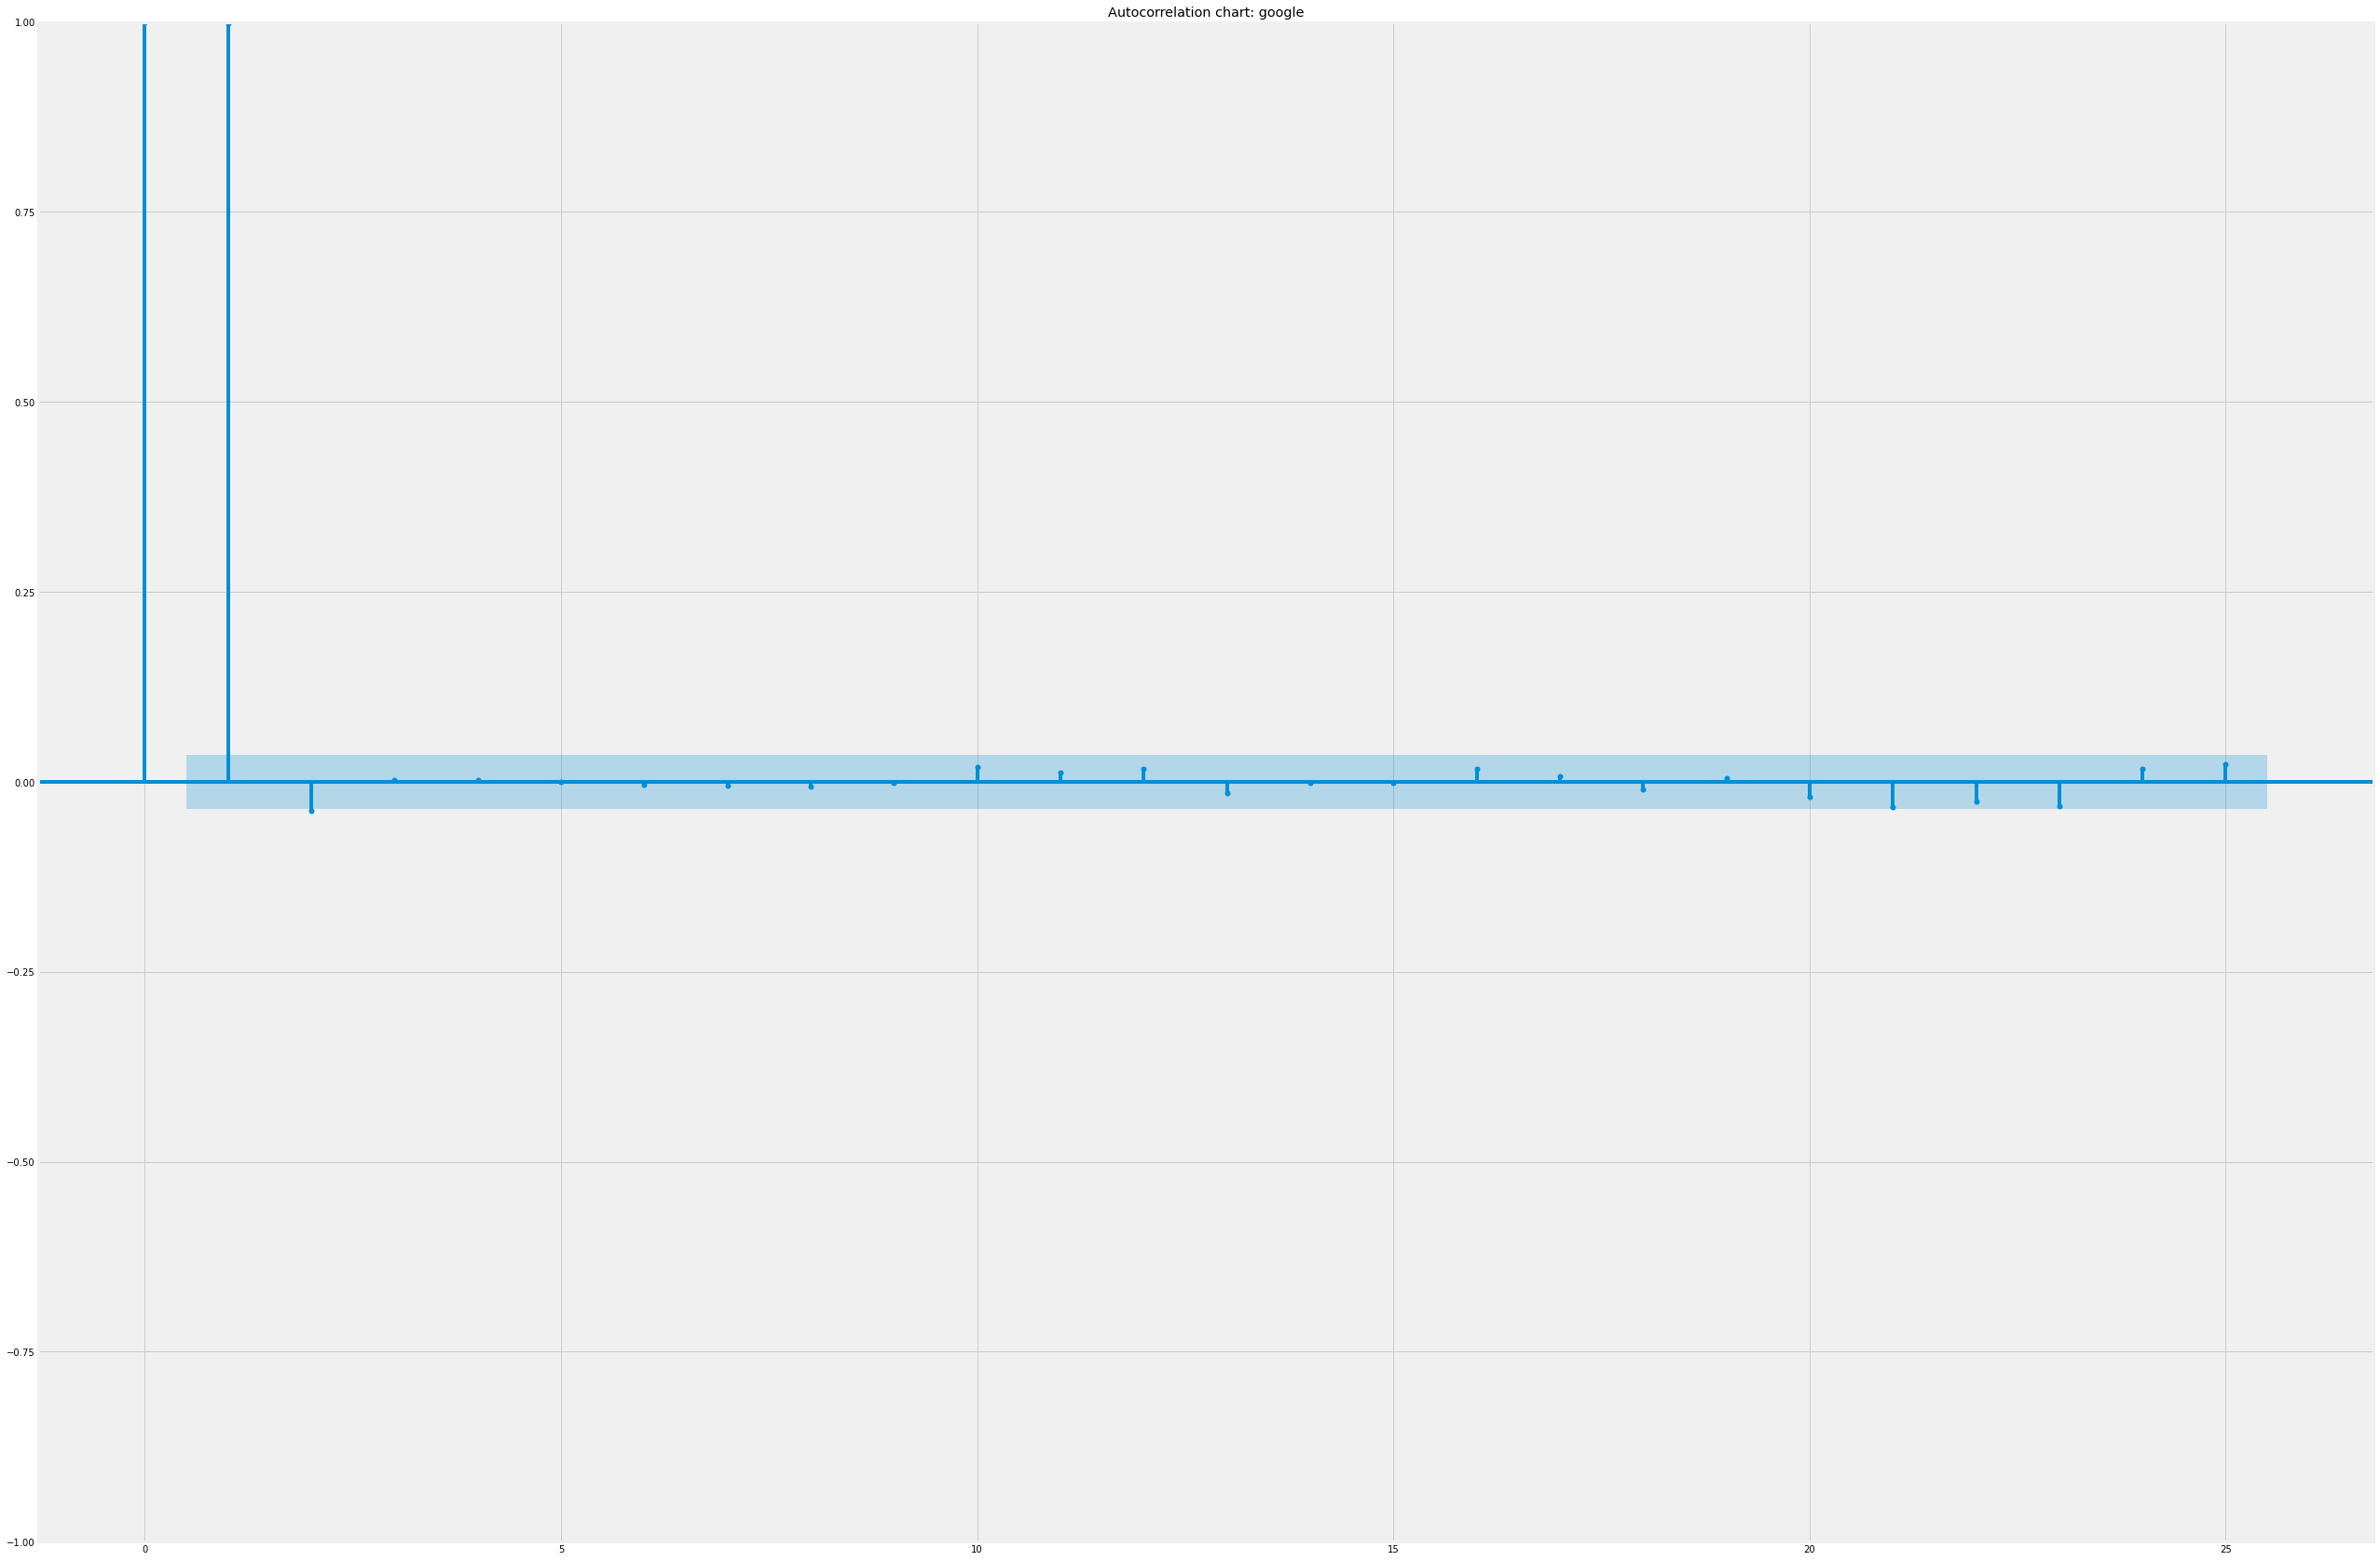

In [94]:
plot_pacf(google.High,lags=25,title="Autocorrelation chart: google")
plt.show()

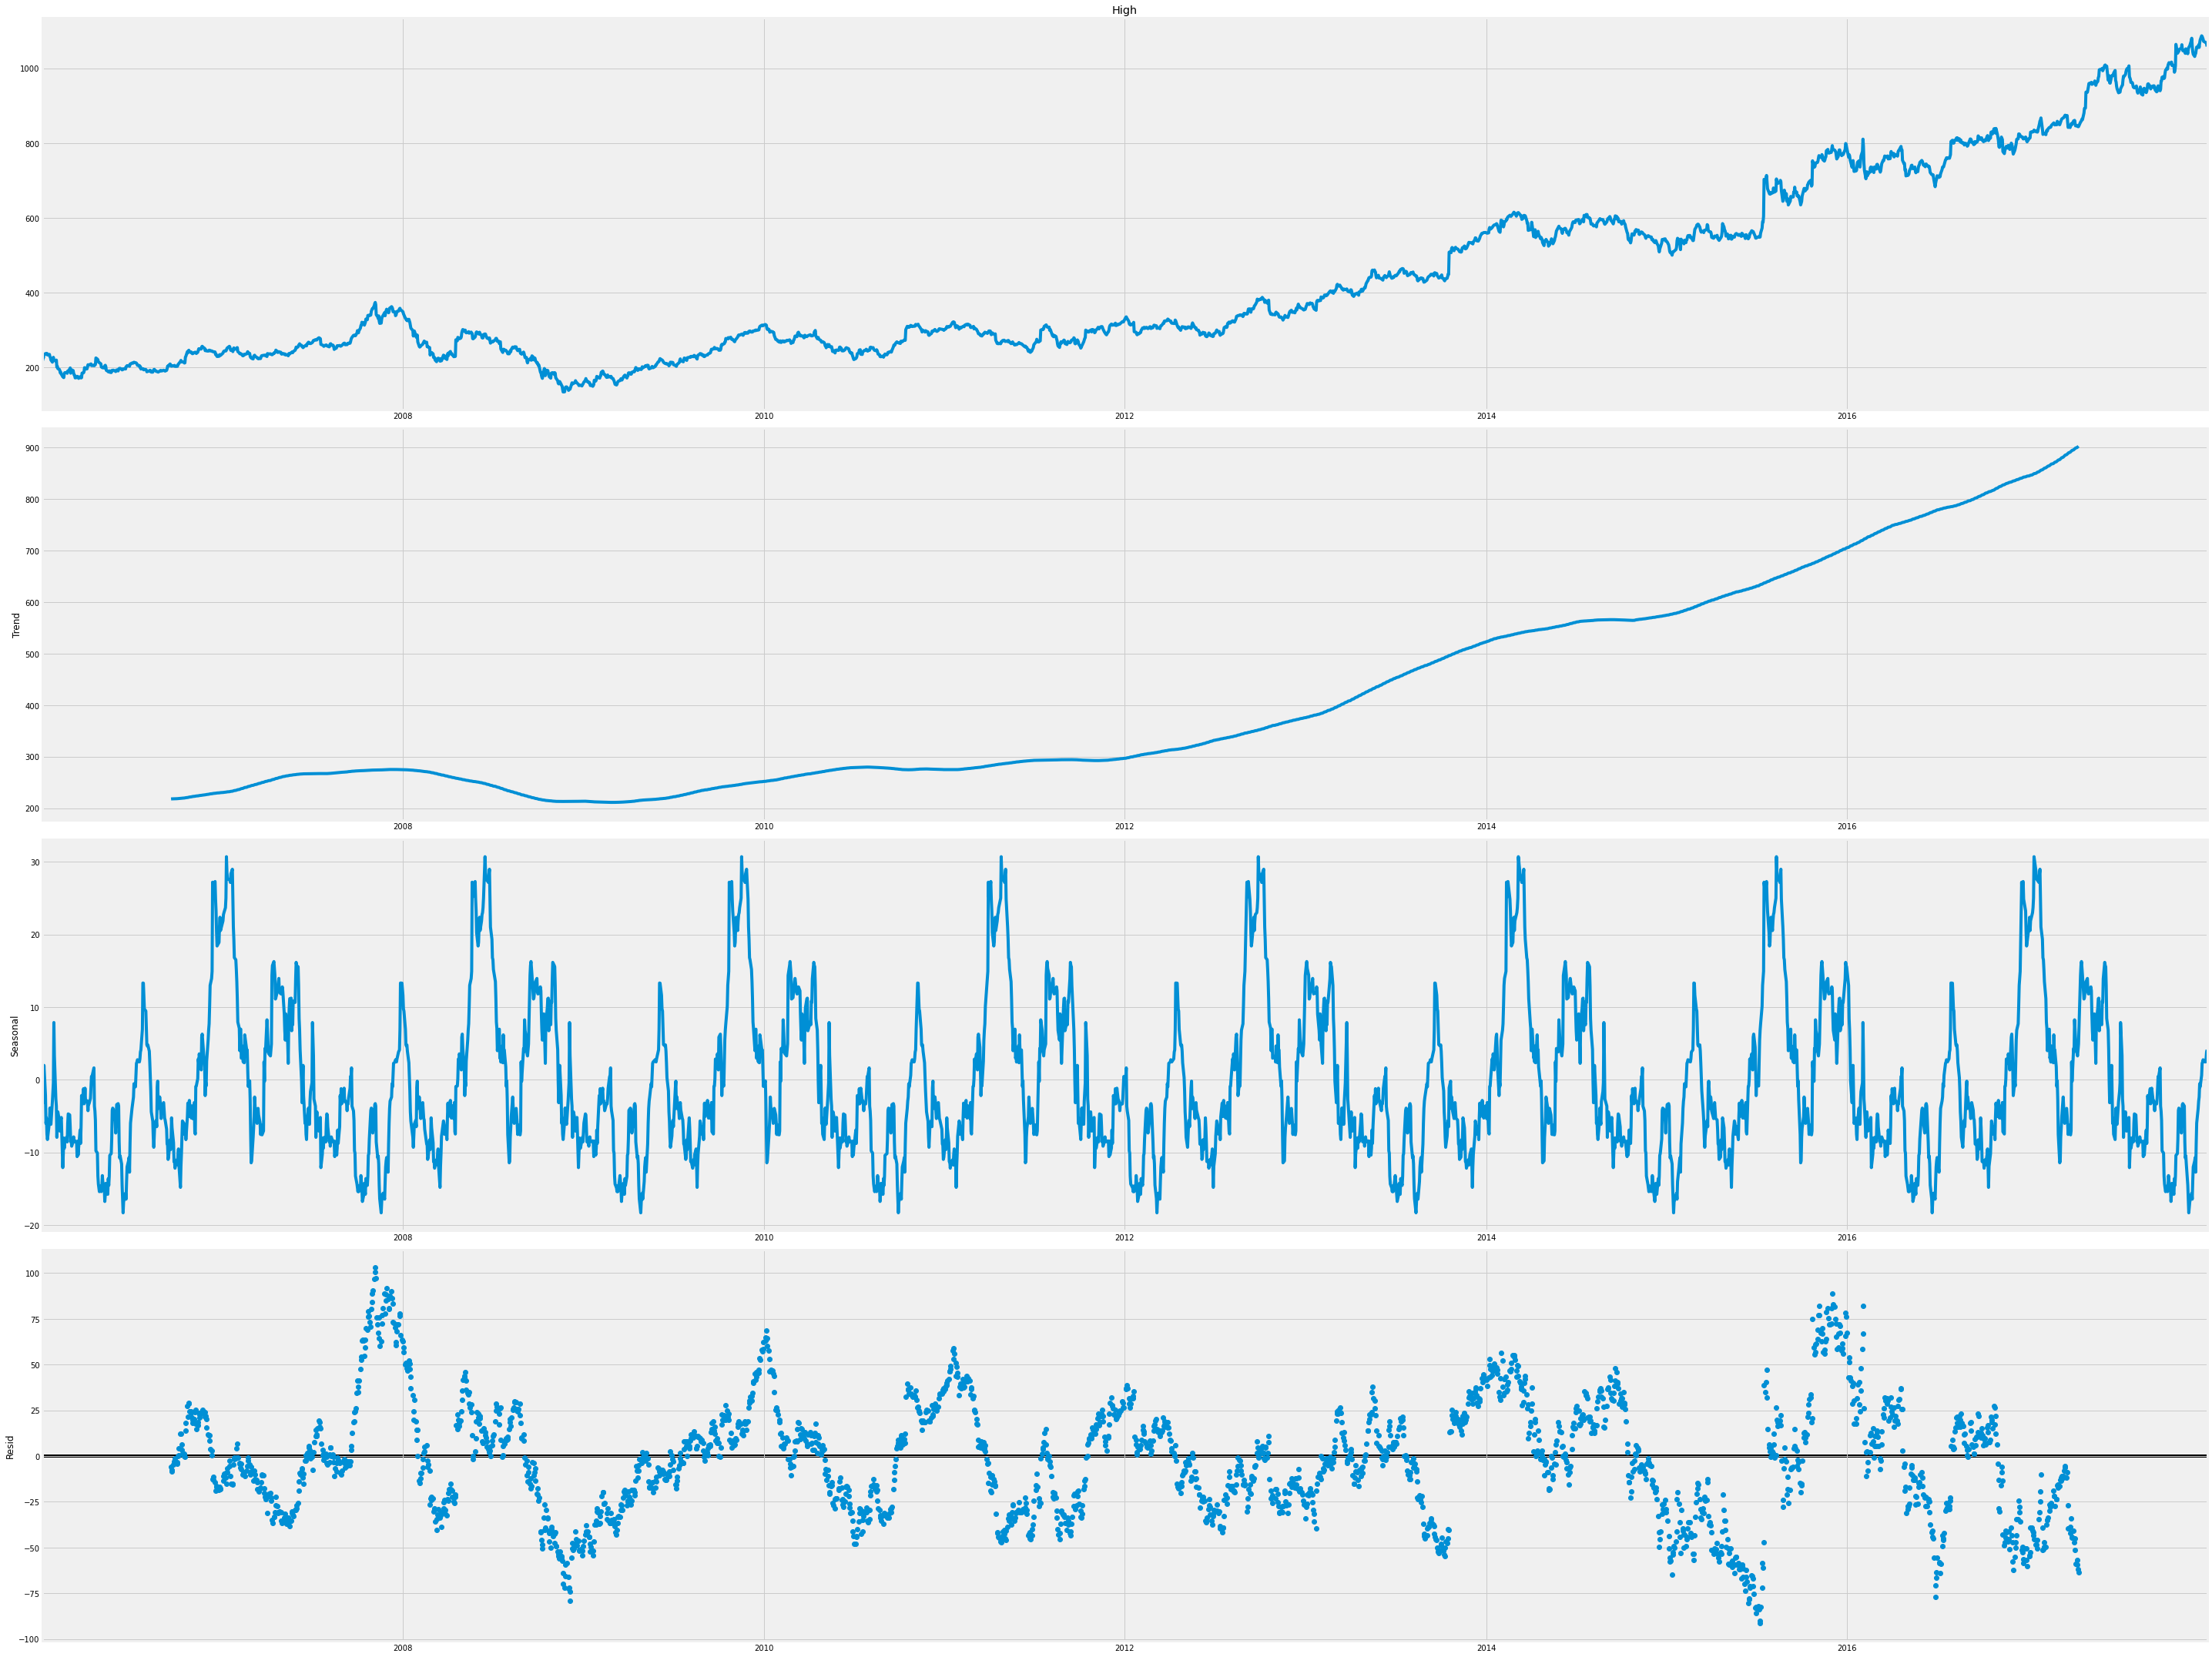

In [111]:
decomposed = sm.tsa.seasonal_decompose(google['High'],period=360) # The frequncy is annual
figure = decomposed.plot()
plt.show()

# Aside: Random walk <a class="anchor" id="random_walk"></a>

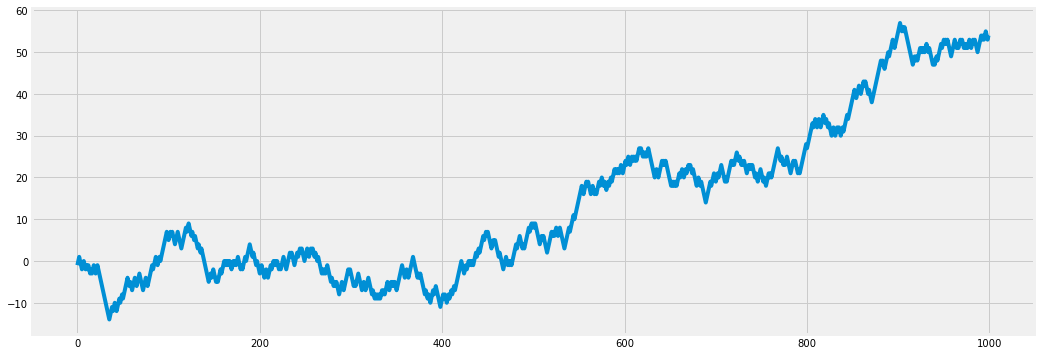

In [115]:
from random import seed
from random import random

seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
plt.plot(random_walk)
plt.show()

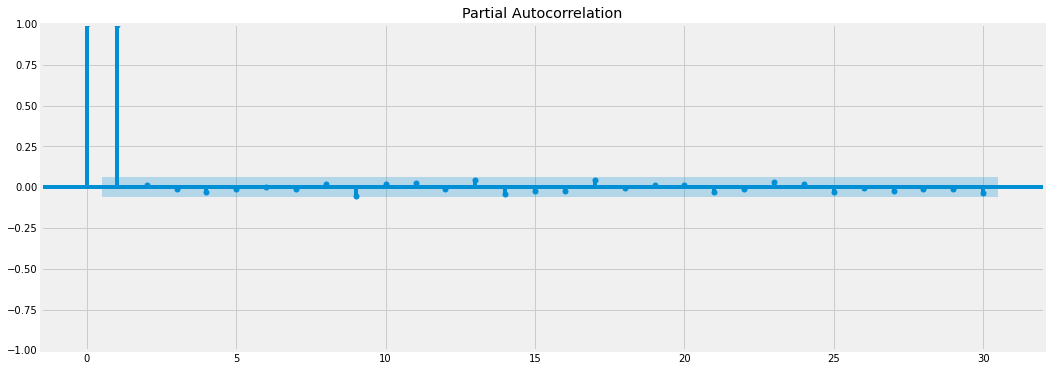

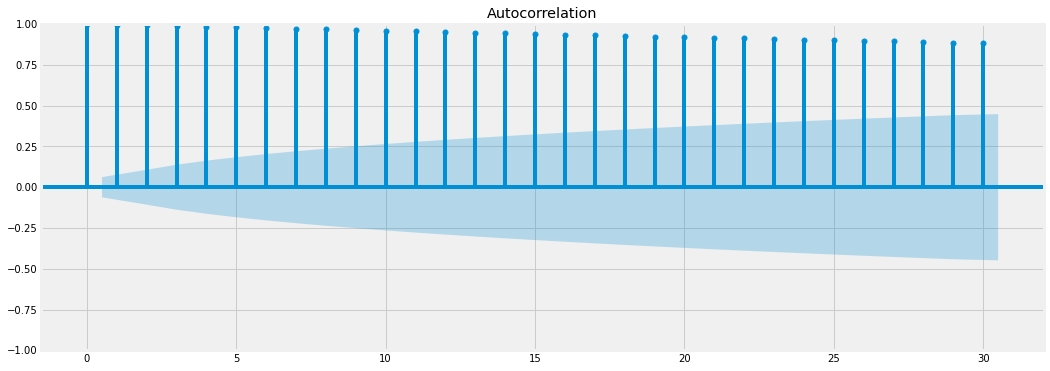

In [141]:
arr = np.array(random_walk)
plot_pacf(arr)
plt.show()

plot_acf(arr)
plt.show()

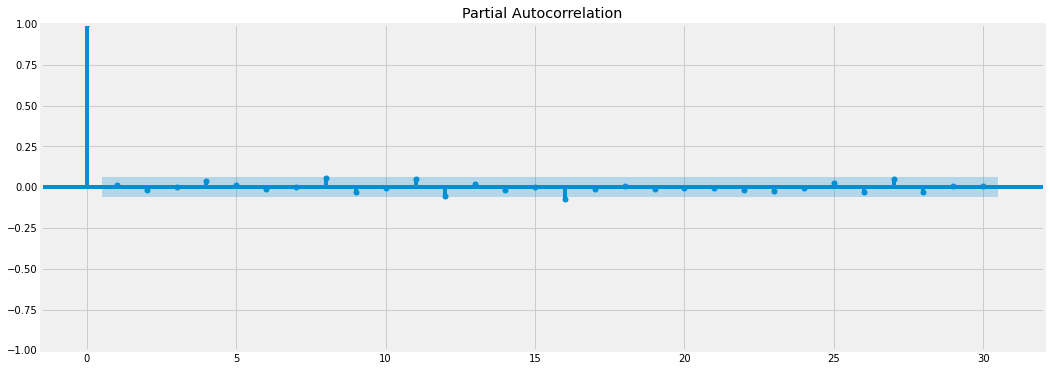

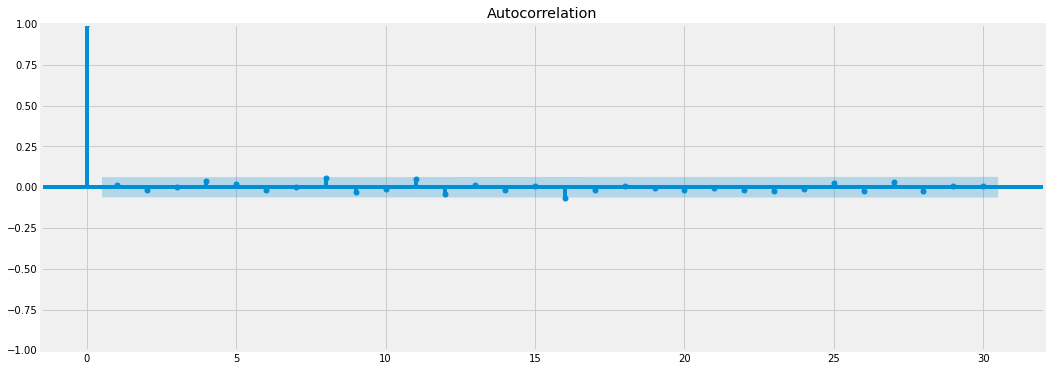

In [124]:
arr = np.array(random_walk)
plot_pacf(np.diff(arr))
plt.show()

plot_acf(np.diff(arr))
plt.show()

In [125]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(random_walk, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1417.520
Date:                Fri, 29 Apr 2022   AIC                           2837.039
Time:                        23:39:27   BIC                           2841.946
Sample:                             0   HQIC                          2838.904
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.0000   6945.164      0.000      1.000   -1.36e+04    1.36e+04
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               166.51
Prob(Q):                              0.63   Pr

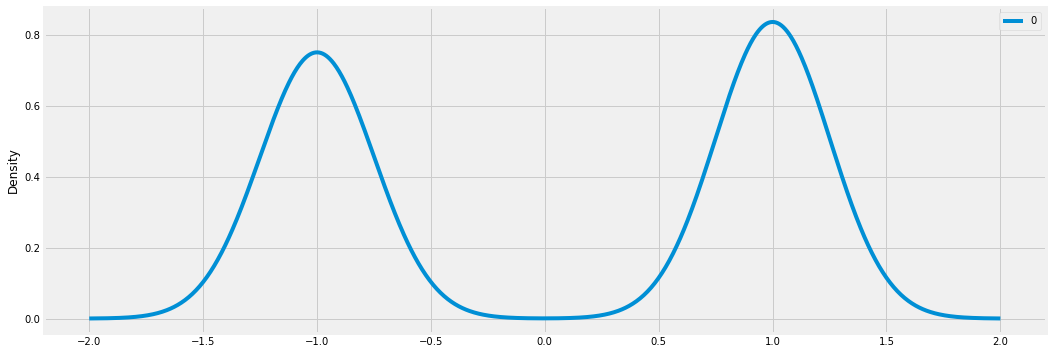

                 0
count  1000.000000
mean      0.054000
std       0.999041
min      -1.000000
25%      -1.000000
50%       1.000000
75%       1.000000
max       1.000000


In [131]:
from pandas import DataFrame

residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [132]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(np.diff(random_walk))
print("p-value of Oracle: {}".format(float(adf[1])))

p-value of Oracle: 0.0


In [133]:
adf = adfuller(random_walk)
print("p-value of Oracle: {}".format(float(adf[1])))

p-value of Oracle: 0.9791747967918744


# Aside: White noise <a class="anchor" id="white_noise"></a>

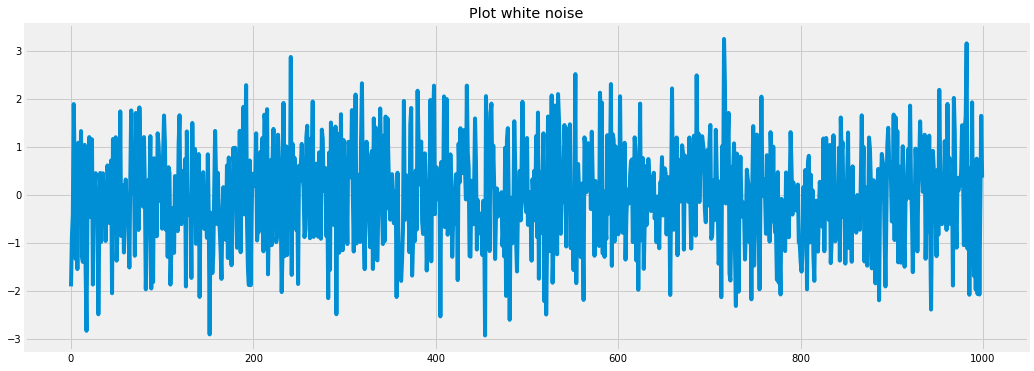

In [142]:
from random import seed
from random import random

seed(42)
rcParams['figure.figsize'] = 16, 6
white_noise = normal(loc=0, scale=1, size=1000)
_ = plt.title('Plot white noise')
plt.plot(white_noise)
plt.show()

In [143]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(white_noise)
print("p-value of Oracle: {}".format(float(adf[1])))

p-value of Oracle: 0.0


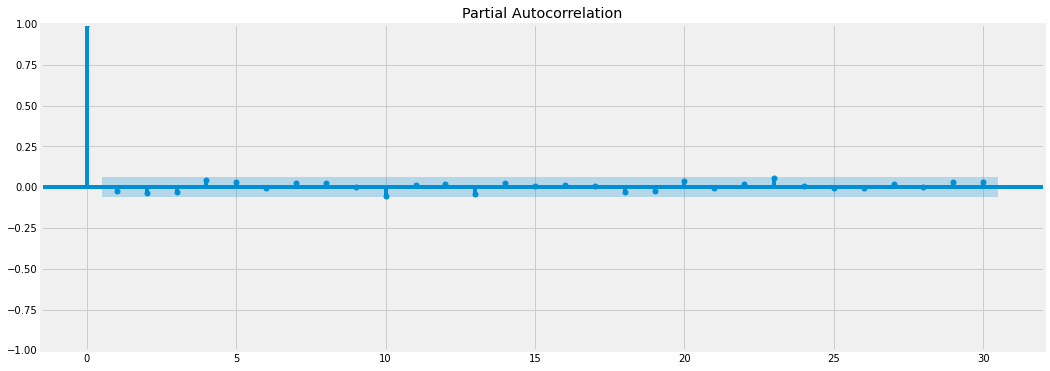

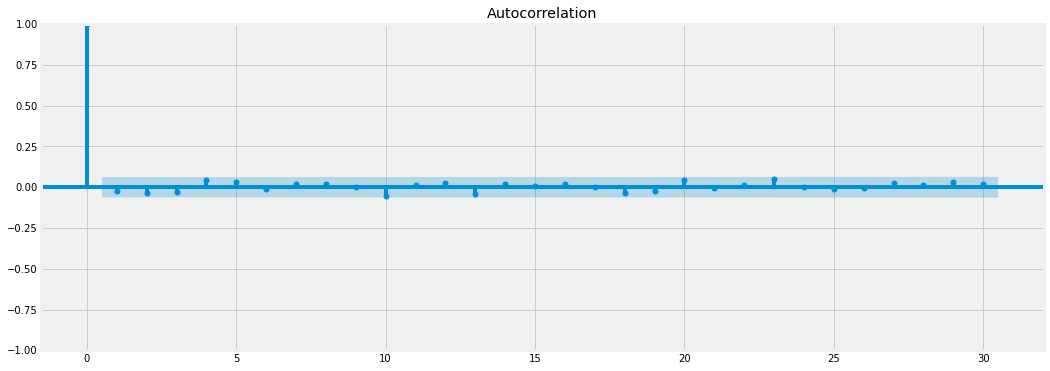

In [145]:
arr = np.array(white_noise)
plot_pacf(arr)
plt.show()

plot_acf(arr)
plt.show()

# Aside: Simulating ARMA <a class="anchor" id="ARMA"></a>

## ARMA <a class="anchor" id="arma"></a>

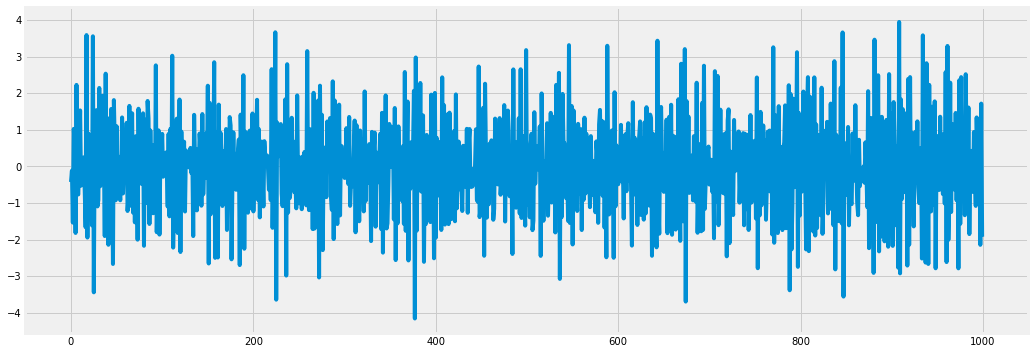

In [157]:
ar = np.array([1,0.3])
ma = np.array([1, -0.5])
sample = ArmaProcess(ar, ma)
ts = sample.generate_sample(nsample=1000)
plt.plot(ts)
plt.show()

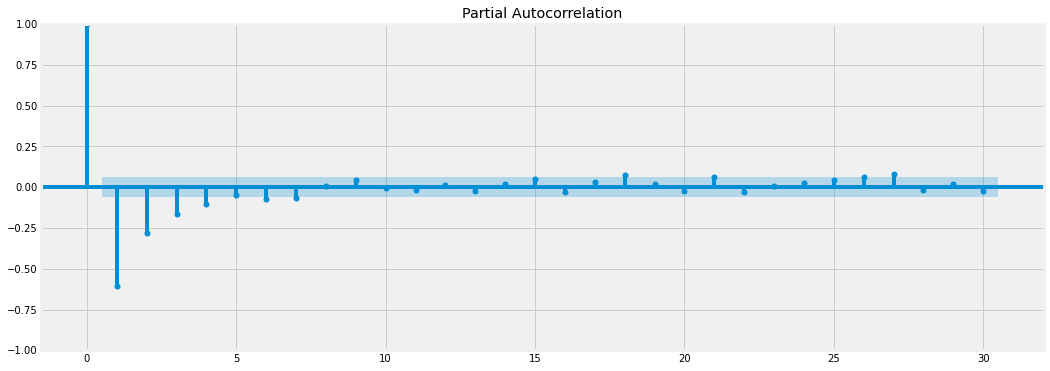

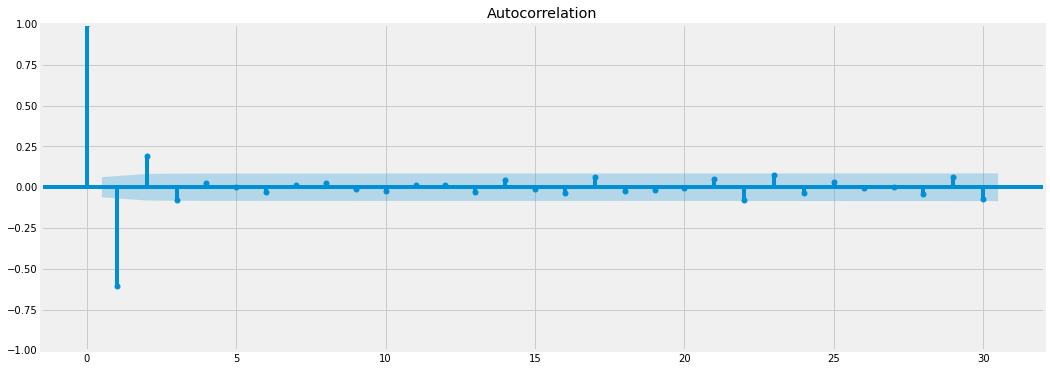

In [158]:
arr = np.array(ts)
plot_pacf(arr)
plt.show()

plot_acf(arr)
plt.show()

## AR <a class="anchor" id="ar"></a>

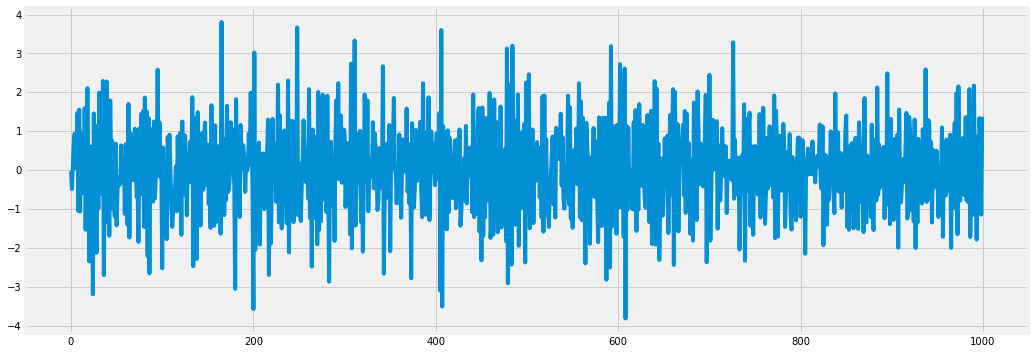

In [163]:
ar = np.array([1,0.5])
ma = np.array([1])
sample = ArmaProcess(ar, ma)
ts = sample.generate_sample(nsample=1000)
plt.plot(ts)
plt.show()

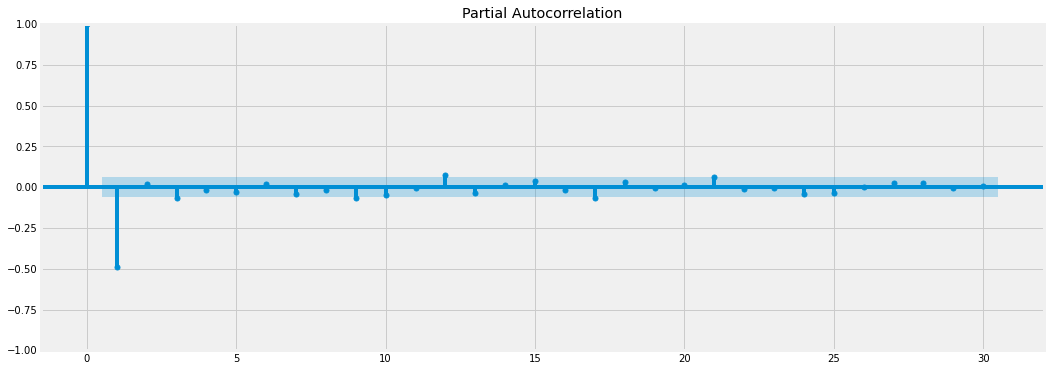

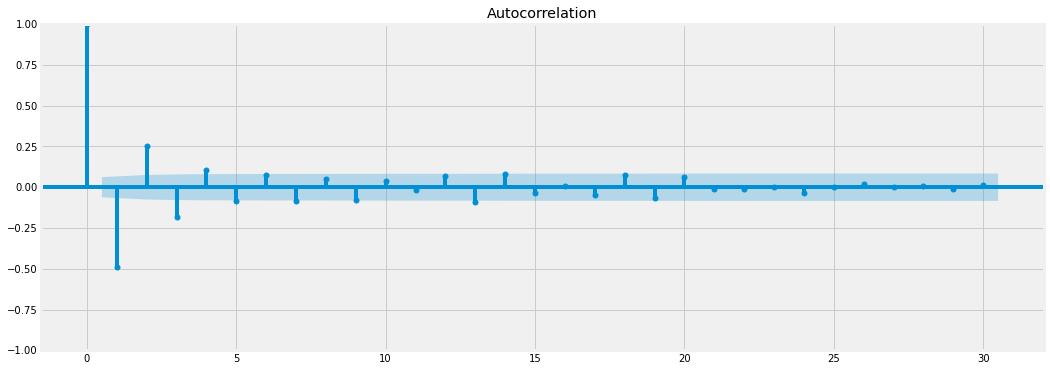

In [164]:
arr = np.array(ts)
plot_pacf(arr)
plt.show()

plot_acf(arr)
plt.show()

## MA <a class="anchor" id="ma"></a>

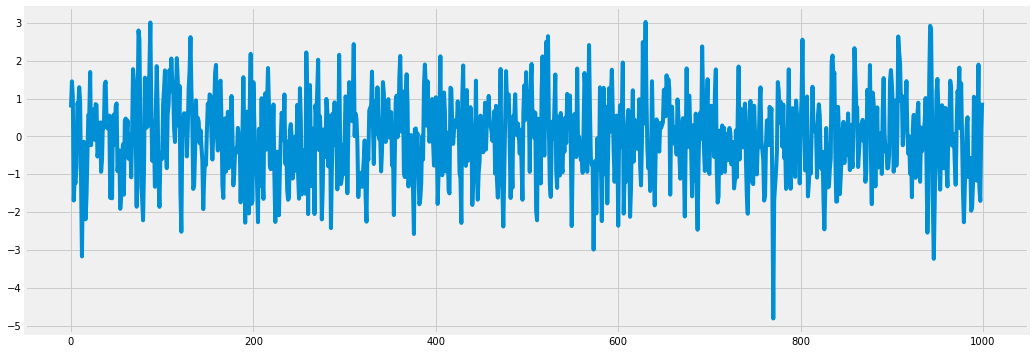

In [165]:
ar = np.array([1])
ma = np.array([1,0.5])
sample = ArmaProcess(ar, ma)
ts = sample.generate_sample(nsample=1000)
plt.plot(ts)
plt.show()

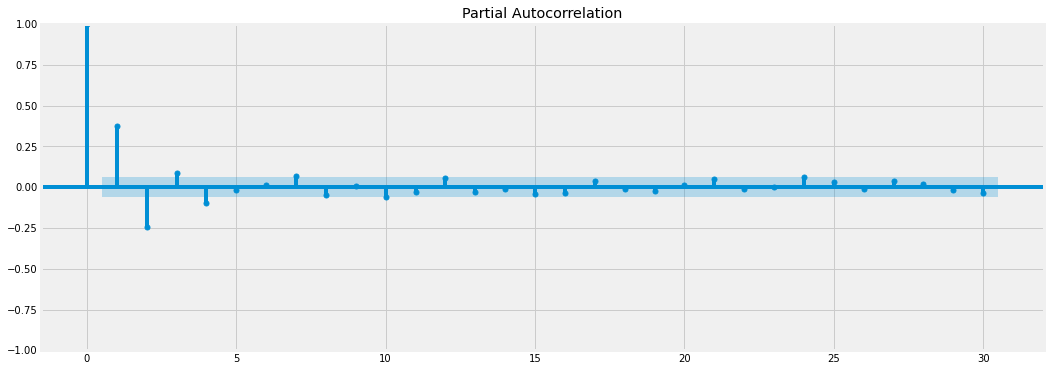

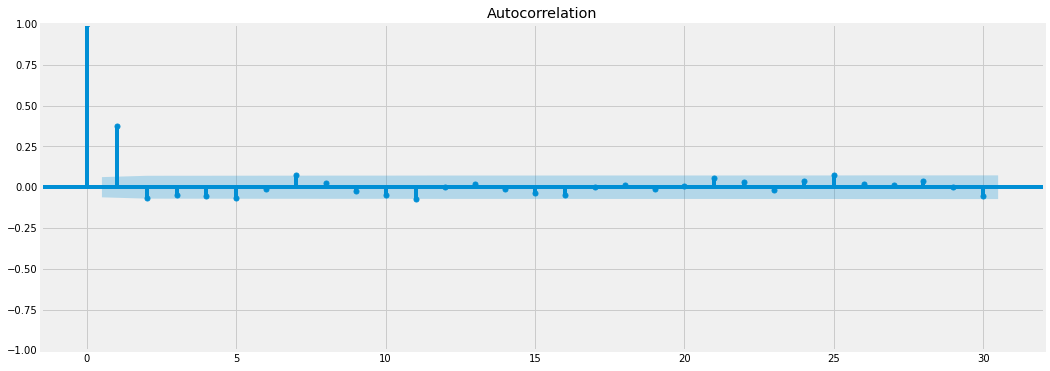

In [166]:
arr = np.array(ts)
plot_pacf(arr)
plt.show()

plot_acf(arr)
plt.show()

# Back to stock <a class="anchor" id="back_to_stock"></a>